<a href="https://colab.research.google.com/github/MarcosRMG/Bootcamp-Alura-Data-Science/blob/main/Projeto_do_M%C3%B3dulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<font size=15>**Pesquisa Nacional de Saúde do Escolar - PeNSE 2015: *Saúde sexual e reprodutiva***</font>


---



Autor: Marcos Galvão

[Linkedin](https://br.linkedin.com/in/marcosrmgalvao)

[Github](https://github.com/MarcosRMG)

[Blog Jogando com Dados](https://jogandocomdados.blogspot.com/)


---

# **1 Resumo**

O seguinte projeto tem como tema a saúde sexual e reprodutiva dos escolares que participaram da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015, foram explorados os dados da amostra 1 (escolares cursando o 9º ano do ensino fundamental) e amostra 2 (escolares cursando do 6º ano do ensino fundamental ao 3º ano do ensino médio). Para ambas as amostras as perguntas foram divididas em três categorias, sendo elas: relação sexual, prevenção à gravidez e DST's e violência sexual. No tópico 2.1 se concentra o tratamentos dos dados e funções para visualização dos resultados, no tópico 2.2 foram feitas as análises das perguntas relacionadas a saúde sexual bem como perguntas de caráter geral. A pesquisa caracteriza se como de caráter exploratório descritivo, mas não partiu de um problema de pesquisa previamente elaborado, algumas informações como idade média relacionada a alguma pergunta não foi explorada pois as idades (bem como as demais variáveis de interesse) foram categorizadas no questionário, outras questões sobre o aumento ou diminuição de alguma variável também não poderam ser exploradas pois não foi feita uma análise temporal das questões aqui expostas. Apesar das limitações aqui apresentadas os resultados demostram a necessidade de se alcançar uma maior parcela de escolares que foram orientados sobre prevenção à gravidez e DST's e meios para a denúncia por parte do escolar sobre o abuso sexual, visto que a maior parcela dos responsáveis pelo abuso são pessoas conhecidas/ próximas do escolar. 

## 1.1 <font size=5>**Orientações de uso do notebook**</font>

1.   Antes de executar qualquer trecho de código execute todas as celulas por meio da função Runtime > Run all disponível no menu superior do Google Colaboratory.

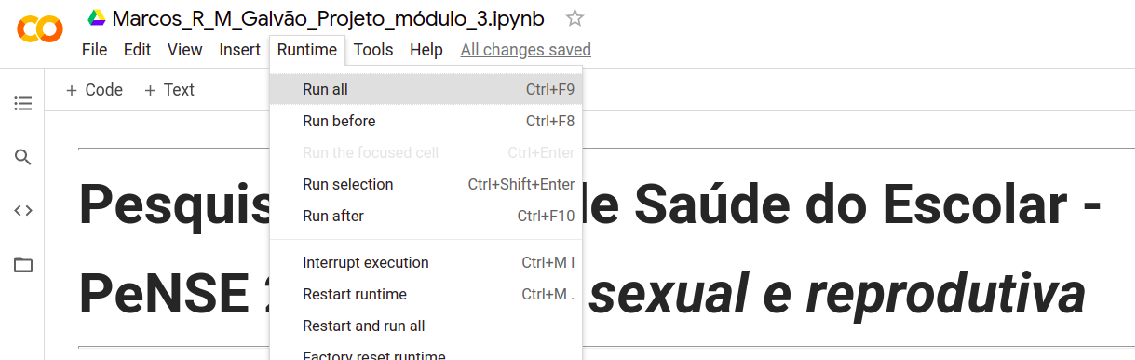

2.   A variável dicionario_variaveis_amostra_2 e dicionario_variaveis_amostra_1 podem ser utilizadas para consulta das perguntas e do respectivo código da pergunta utilizado pelo IBGE.
3. A variável dados_amostra_2 e dados_amostra_1 contém o resultado da pesquisa PeNSE 2015 referente a segunda e primeira amostra.
4. Qualquer alteração nos tópicos de tratamento dos dados (2.1) irá afetar as análises (2.2).



---



## 1.2 <font size=5>**Glossário de variáveis**</font>

dados_amostra_1: [Data Frame pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame) com o resultado da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015 referente a amostra 1, questões aplicadas aos estudantes do 9º ano e referente à escola.

dados_amostra_2: Data Frame pandas com o resultado da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015 referente a amostra 2, questões aplicadas aos escolares de 13 a 17 anos de idade frequentando as etapas do 6º ao 9º ano do ensino fundamental (antigas 5ª a 8ª séries) e da 1ª a 3ª série do ensino médio e referente à escola.

dicionario_variaveis_amostra_1: [Dicionário Python](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) contendo uma [lista Python](https://docs.python.org/3/tutorial/introduction.html#lists) onde o index 0 contém o código da pergunta da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015, e o índex 1 um dicionário com as opções de respostas. 

Ex: 

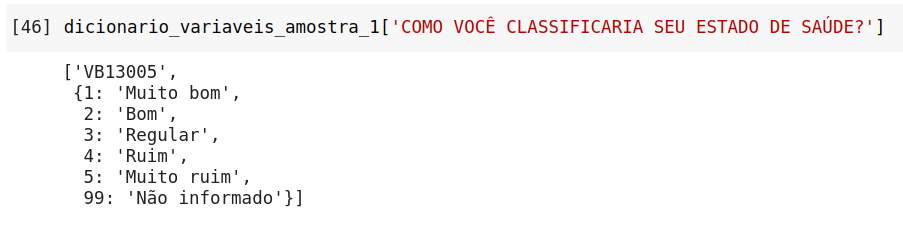

dicionario_variaveis_amostra_2: Dicionário Python contendo uma lista Python onde o index 0 contém o código da pergunta da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015, e o índex 1 um dicionário com as opções de respostas (obs: mesma estrutura da variável dicionario_variaveis_amostra_1). 



---



# **2 Tratamento e Análise dos Dados**

## *2.1 Tratamento dos Dados*

### 2.1.1 Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ranksums
import numpy as np
plt.rcParams.update({'font.size': 15})

### 2.1.2 Funções

#### 2.1.2.1 Dicionário de Variáveis

In [ ]:
def adaptacao_df_dicionario(df_dicionario_variaveis: pd.DataFrame, coluna_1: str,
                            coluna_2: str):
  '''
  Altera o nome das colunas e o tipo de dados para string

  Keywords arguments:
  df_dicionario_variaveis: Data Frame com o dicionário das variáveis.
  coluna_1: Nome da primeira coluna.
  coluna_2: Nome da segunda coluna.

  return: Data Frame com o nome das colunas e tipos de dados alterados.
  '''

  df_dicionario_variaveis.columns = [coluna_1, coluna_2]
  df_dicionario_variaveis = df_dicionario_variaveis.astype('str')
  return df_dicionario_variaveis

In [ ]:
def codigos_descricao_perguntas(dicionario_amostra: pd.DataFrame, 
                                coluna_codigos: str, coluna_descricao: str):
  '''
  A função cria duas listas, uma com os códigos do dicionário de variáveis e
  outra com as descrições do dicionário de variáveis.
  
  Keyword arguments
  dicionario_amostra: Data Frame com os dados do dicionário.
  coluna_codigos: Especificação da coluna do Data Frame que contém os códigos.
  coluna_descrição: Especificação da coluna do Data Frame que contém as
  descrições.

  return: Duas listas com os códigos e descrições do dicionário de variáveis.

  '''
  codigos_perguntas = []
  descricao_perguntas = []
  linha = 0

  for i in dicionario_amostra[coluna_codigos]:
    if i.isupper():
      codigos_perguntas.append(i)
      dicionario_amostra[coluna_descricao][linha] = dicionario_amostra[coluna_descricao][linha].upper()
      descricao_perguntas.append(dicionario_amostra[coluna_descricao][linha])
    linha += 1
  return codigos_perguntas, descricao_perguntas  

In [ ]:
def captura_opcoes_resposta(df_dicionario_variaveis: pd.DataFrame, coluna_controle:
                            str, coluna_opcoes_resposta: str):
  '''
  Cria uma lista com as opções de resposta do dicionário de variáveis

  Keywords arguments:
  df_dicionario_variaveis: Data Frame com as informações do dicionário de 
  variáveis.
  coluna_controle: Coluna para checagem dos critérios de captura dos dados, 
  primeira coluna do Data Frame.
  coluna_opcoes_resposta: Coluna para captura das informações, segunda coluna
  do Data Frame.

  return: Lista com as opções de resposta do dicionário de variáveis.
  '''

  opcoes_resposta = []
  linha = 0

  for i in df_dicionario_variaveis[coluna_controle]:
    if i.isdigit() or i == '-1' or i == '0 a 2999':
      opcoes_resposta.append(i)
      opcoes_resposta.append(df_dicionario_variaveis[coluna_opcoes_resposta][linha])
    linha += 1

  return opcoes_resposta

In [ ]:
def converte_para_inteiro(opcoes_resposta: list):
  '''
  Converte a lista de opções de resposta para o tipo int

  Keywords arguments:
  opcoes_resposta: Lista com os códigos de opção de resposta do dicionário de
  variáveis.

  return: Lista com os tipos de opções de resposta no tipo int
  '''

  cont = 0

  for i in opcoes_resposta:
    if i.isdigit() or i == '-1':
      opcoes_resposta[cont] = int(i)
    cont += 1
  return opcoes_resposta

In [ ]:
def cria_dicionario_variaveis(df_dicionario_amostra: pd.DataFrame, 
                              descricao_perguntas: list, codigos_perguntas: list,
                              primeira_coluna: str):

  '''
  Cria um dicionário com as variáveis da pesquisa

  Keywords arguments:
  df_dicionario_amostra['primeira_coluna']: DataFrame com os dados do dicionário
  de variáveis.
  descricao_perguntas: Lista com a descrição das perguntas do dicionário de 
  variáveis.
  codigos_perguntas: Códigos das perguntas do dicionário de variáveis.
  primeira_coluna: Coluna para seleção das informações do Data Frame com as 
  informações do dicionário de variáveis.

  return: Dicionário com todas as informações do dicionário de variáveis da 
  pesquisa.
  '''

  dicionario_variaveis = {}


  item_descricao_pergunta = item_codigo_pergunta = item_opcao_resposta = 0

  for i in df_dicionario_amostra[primeira_coluna][:-3]:
    if i.isupper():
      dicionario_variaveis[descricao_perguntas[item_descricao_pergunta]] = [codigos_perguntas[item_codigo_pergunta]]
      dicionario_variaveis[descricao_perguntas[item_descricao_pergunta]].append(dict())
      item_descricao_pergunta += 1
      item_codigo_pergunta += 1
    else:
      dicionario_variaveis[descricao_perguntas[item_descricao_pergunta - 1]][1].update({
      opcoes_resposta[item_opcao_resposta]: opcoes_resposta[item_opcao_resposta + 1]})
      item_opcao_resposta += 2

  return dicionario_variaveis

#### 2.1.2.2 Calcula proporções

In [ ]:
def calcula_proporcao(df_dados_amostra: pd.DataFrame, codigo_pergunta: str):
  '''
  Calcula a proporção do resultado da pergunta
  
  Keywords arguments
  df_dados: Data Frame com o resultado da amostra selecionada.
  codigo_pergunta: Pergunta selecionada para cálculo.

  return: Resultados da pergunta em percentual.
  '''

  return pd.DataFrame(round(df_dados_amostra[codigo_pergunta].value_counts(normalize=True) * 100, 2))

#### 2.1.2.3 Gráfico de Pizza

In [ ]:
def grafico_pizza(dados_resultado: pd.DataFrame, codigo_pergunta: str, titulo: str):
  '''
  Imprime o resultado da pergunta no gráfico de pizza.

  dados_resultado: Data Frame com os resultados da pergunta.
  codigo_pergunta: Código da pergunta para visualização do resultado.
  titulo: Título do gráfico.
  '''

  _ = px.pie(dados_resultado, names=dados_resultado.index, values=codigo_pergunta,
       title=titulo)
  _.update_layout(font=dict(size=14))
  _.show()

#### 2.1.2.4 Altera opções de resposta

In [ ]:
def altera_opcoes_resposta(df_dados_amostra: pd.DataFrame, 
                           dicionario_variaveis_amostra: dict, 
                           codigo_pergunta: str,
                           descricao_pergunta: str):
  '''
  Altera a descrição das opções de resposta na pergunta

  Keywords
  df_dados_amostra: Data Frame com o resultado da amostra.
  dicionario_variaveiss_amostra: Dicionário de variáveis da amostra.
  codigo_pergunta: Código da pergunta constante no dicionário de variáveis da 
  amstra.
  descricao_pergunta: descrição da pergunta constante no dicionário de variáveis
  da amstra.

  return: Coluna do resultado da amostra com a opçõesde resposta alterado 
  seguindo o dicionário de variáveis da amostra.
  '''

  return df_dados_amostra[codigo_pergunta].map(dicionario_variaveis_amostra[descricao_pergunta][1])

#### 2.1.2.5 Gráfico de barras

In [ ]:
def grafico_barras(dados_resultado: pd.DataFrame, codigo_pergunta: str, 
                   titulo: str, x_label: str, y_label: str):

  '''
  Imprime o gráfico de barras

  Keywords arguments
  dados_resultado: Data Frame do resultado calculado em percentual.
  codigo_pergutna: Código da pergunta com o resultado calculado.
  titulo: Título do gráfico.
  x_label: Descrição do eixo x.
  y_label: Descrição do eixo y.
  '''

  _ = px.bar(dados_resultado, x=dados_resultado.index, y=codigo_pergunta,
       title=titulo)
  _.update_layout(xaxis_title=x_label, yaxis_title=y_label, font=dict(size=14))
  _.show()

#### 2.1.2.6 Tabela de frequência

In [ ]:
def tabela_frequencia(df_dados_amostra: pd.DataFrame, codigo_pergunta: str,
                      titulo_indice: str):
  '''
  Cria um DataFrame com uma coluna de frequência e outra com a respectiva 
  proporção

  Keywords arguments
  df_dados_amostra: DataFrame com os dados da amostra da pequisa estudada.
  codigo_pergunta: Código da pergunta para criar a tabela de frequência.
  titulo_indice: Título para identificar o índice.

  return: Tabela de frequêcia calculada.
  '''

  frequencia = df_dados_amostra[codigo_pergunta].value_counts()
  proporcao = round(df_dados_amostra[codigo_pergunta].value_counts(normalize=True) * 100, 1)

  df_tabela = pd.DataFrame({'Frequência': frequencia, 'Proporção %': proporcao})
  df_tabela.rename_axis(titulo_indice, inplace=True)

  return df_tabela


#### 2.1.2.7 Tabela cruzada percentual

In [ ]:
def tabela_cruzada_proporcao(df_dados_amostra: pd.DataFrame, codigo_indice: str,
                             codigo_coluna: str, orientacao_proporcao: str, 
                             titulo_indice: str, titulo_coluna: str): 
    
    '''
    Retorna o cruzamento de duas variáveis calculando a proporção pelo índice ou
    pelas colunas.

    Keywords arguments
    df_dados_amostra: DataFrame com os dados da amostra.
    codigo_indice: Código da pergunta para ser calculada no índice.
    codigo_coluna: Código da pergunta para ser calculada na coluna.
    orientacao_proporcao: Calcula a proprcao pelo índice (index), pela coluna 
    (columns) ou pela tabela total (all).
    titulo_indice: Título para descriminação da variável posicionada no índice.
    titulo_coluna: Título para descriminação da variável posicionada na coluna.

    return: Tabela de proporção cruzada.
    '''

    return round(pd.crosstab(
        index=df_dados_amostra[codigo_indice],
        columns=df_dados_amostra[codigo_coluna],
        normalize=orientacao_proporcao,
        rownames=[titulo_indice],
        colnames=[titulo_coluna]) * 100, 1)

#### 2.1.2.8 Tabela cruzada calcula valor

In [ ]:
def tabela_cruzada_valor(df_dados_amostra: pd.DataFrame, codigo_indice: str,
                             codigo_coluna: str, codigo_valor: str, funcao: str,
                             titulo_indice: str, titulo_coluna: str):
    '''
    Retorna o cruzamento de duas variáveis calculando o valor desejado.

    Keywords arguments
    df_dados_amostra: DataFrame com os dados da amostra.
    codigo_indice: Código da pergunta para ser calculada no índice.
    codigo_coluna: Código da pergunta para ser calculada na coluna.
    codigo_valor: Valor para cálculo da média.
    funcao: Função a ser aplicada no valor especificado.
    titulo_indice: Título para descriminação da variável posicionada no índice.
    titulo_coluna: Título para descriminação da variável posicionada na coluna.

    return: Tabela de proporção cruzada.
    '''

    return round(pd.crosstab(
      index=df_dados_amostra[codigo_indice],
      columns=df_dados_amostra[codigo_coluna],
      values=df_dados_amostra[codigo_valor],
      aggfunc=funcao,
      colnames=[titulo_coluna],
      rownames=[titulo_indice]))

### 2.1.3 Dados

Pesquisa Nacional de Saúde do Escolar - PeNSE 2015

A pesquisa fornece informações sobre as características básicas da população de estudo, incluindo aspectos socioeconômicos, como escolaridade dos pais, inserção no mercado de trabalho e posse de bens e serviços; contextos social e familiar; fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas; saúde sexual e reprodutiva; exposição a acidentes e violências; hábitos de higiene; saúde bucal; saúde mental; e percepção da imagem corporal, entre outros tópicos. Características do ambiente escolar e do entorno são também contempladas, incluindo informações relacionadas à infraestrutura disponível para alimentação e atividade física; acessibilidade; saneamento básico; existência de regras e normas de conduta adotadas pelas escolas; políticas de assistência à saúde; e nível de segurança do entorno, entre outros aspectos (IBGE).

#### 2.1.3.1 Amostra 2 (2015)

"Investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP (IBGE)".

Amostra 2:
"escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio (IBGE)".

In [ ]:
fonte_amostra_2 = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/PENSE_AMOSTRA2_ALUNOESCOLA.CSV'

dados_amostra_2 = pd.read_csv(fonte_amostra_2, sep=';')

In [ ]:
#Primeiras linhas
dados_amostra_2.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,5,1,296


In [ ]:
#Últimas linhas
dados_amostra_2.tail()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
16551,2015,76,5,1,2,4,12,8,8,1,1,7,5,2,-1,1,1,1,1,1,1,3,1,3,1,2,2,6,3,8,7,5,8,7,5,1,2,1,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16552,371,117
16552,2015,76,5,1,1,1,15,7,5,1,1,7,4,2,-1,2,1,1,1,1,1,3,1,3,1,1,2,5,4,6,2,4,1,6,1,1,6,4,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16553,371,117
16553,2015,76,5,1,1,4,13,11,7,1,1,7,4,2,-1,1,2,1,1,1,2,3,1,3,1,2,2,5,4,8,1,8,2,8,1,1,5,5,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16554,371,117
16554,2015,76,5,1,1,4,14,8,6,1,1,7,4,2,-1,1,1,1,1,1,1,3,2,3,1,1,2,5,3,7,5,6,4,8,7,3,1,5,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16555,371,117
16555,2015,76,5,1,1,2,15,4,6,1,1,7,5,2,-1,1,1,1,1,1,1,3,2,3,1,2,2,4,4,8,2,6,8,8,5,1,6,1,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,16556,371,117


##### 2.1.3.1.1 Dicionáiro da Amostra 2

In [ ]:
fonte_dicionario_amostra_2 = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Dicionario_PENSE_Microdados_AMOSTRA2.csv'

df_dicionario_amostra_2 = pd.read_csv(fonte_dicionario_amostra_2)

In [ ]:
#Primeiras linhas
df_dicionario_amostra_2.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
#Últimas linhas
df_dicionario_amostra_2.tail()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
1213,3,Confessional
1214,4,Filantrópica
1215,aluno,contador de aluno
1216,escola,UPA (unidade primária de amostragem)
1217,turma,USA (unidade secundária de amostragem)


##### 2.1.3.1.2 Dicionário Python do dicionário da amostra 2

Modelo do dicionário Python para o dicionário da amostra 2

dicionario = { pergunta: [codigo da pergunta, {código da resposta: opção de resposta}]}

In [ ]:
#Adaptação do Data Frame
df_dicionario_amostra_2 = adaptacao_df_dicionario(df_dicionario_amostra_2, 'variavel',
                                               'questionario_aluno')

In [ ]:
df_dicionario_amostra_2.head()

,variavel,questionario_aluno
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
#Capturando códigos e descrição das perguntas do Data Frame com as informações do dicionário de variáveis
codigos_perguntas, descricao_perguntas = codigos_descricao_perguntas(df_dicionario_amostra_2, 'variavel', 
                            'questionario_aluno')

In [ ]:
#Cinco primeiros
codigos_perguntas[:5]

['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001']

In [ ]:
#Cinco últimos
codigos_perguntas[-5:]

['PESO', 'V0006', 'V0007', 'V0008', 'V0041']

In [ ]:
#Cinco primeiros
descricao_perguntas[:5]

['ANO EM QUE A PESQUISA FOI REALIZADA',
 'PAÍS',
 'REGIÃO GEOGRÁFICA',
 'PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?',
 'QUAL É O SEU SEXO?']

In [ ]:
#Cinco últimos
descricao_perguntas[-5:]

['PESO DO ALUNO DE ACORDO COM A AMOSTRA, UTILIZADO PARA EXPANSÃO',
 'SITUAÇÃO DA ESCOLA',
 'DEPENDÊNCIA ADMINISTRATIVA DA ESCOLA',
 'ESFERA ADMINISTRATIVA DA ESCOLA',
 'TIPO DE ESCOLA PRIVADA']

In [ ]:
#Capturando as opções de resposta do Data Frame
opcoes_resposta = captura_opcoes_resposta(df_dicionario_amostra_2, 'variavel',
                                          'questionario_aluno')

In [ ]:
#Cinco primeiros
opcoes_resposta[:5]

['76', 'Brasil', '1', 'Norte', '2']

In [ ]:
#Cinco últimos
opcoes_resposta[-5:]

['Comunitária', '3', 'Confessional', '4', 'Filantrópica']

In [ ]:
#Convertendo o tipo das opções de resposta do data frame
opcoes_resposta = converte_para_inteiro(opcoes_resposta)

In [ ]:
#Cinco primeiros
opcoes_resposta[:5]

[76, 'Brasil', 1, 'Norte', 2]

In [ ]:
#Cinco últimos
opcoes_resposta[-5:]

['Comunitária', 3, 'Confessional', 4, 'Filantrópica']

In [ ]:
#Gerando o dicionário da amostra 2 para consulta
dicionario_variaveis_amostra_2 = cria_dicionario_variaveis(df_dicionario_amostra_2, descricao_perguntas, 
                          codigos_perguntas, 'variavel', )

In [ ]:
#Exemplo do resultado final
dicionario_variaveis_amostra_2['COMO VOCÊ CLASSIFICARIA SEU ESTADO DE SAÚDE?']

['VB13005',
 {1: 'Muito bom',
  2: 'Bom',
  3: 'Regular',
  4: 'Ruim',
  5: 'Muito ruim',
  99: 'Não informado'}]

In [ ]:
#Perguntas da amostra 2
for i in dicionario_variaveis_amostra_2.keys():
  print(i)

ANO EM QUE A PESQUISA FOI REALIZADA
PAÍS
REGIÃO GEOGRÁFICA
PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?
QUAL É O SEU SEXO?
QUAL É A SUA COR OU RAÇA?
QUAL É A SUA IDADE?
QUAL É O MÊS DO SEU ANIVERSÁRIO?
EM QUE ANO VOCÊ NASCEU?
EM QUE ANO/SÉRIE VOCÊ ESTÁ?
EM QUE TURNO VOCÊ ESTUDA?
VOCÊ ESTUDA EM REGIME INTEGRAL (TEM ATIVIDADES ESCOLARES POR 7 HORAS OU MAIS HORAS DIÁRIAS, DURANTE TODO O PERÍODO ESCOLAR)?
VOCÊ ESTUDA EM REGIME DE INTERNATO (A ESCOLA POSSUI ALOJAMENTO ONDE OS ALUNOS PERMANECEM E DORMEM DIARIAMENTE, DURANTE TODO O PERÍODO ESCOLAR)?
QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?
QUANDO TERMINAR O CICLO/CURSO QUE VOCÊ ESTÁ FREQUENTANDO ATUALMENTE, VOCÊ PRETENDE?
VOCÊ MORA COM SUA MÃE?
VOCÊ MORA COM SEU PAI?
CONTANDO COM VOCÊ, QUANTAS PESSOAS MORAM NA SUA CASA OU APARTAMENTO?
NA SUA CASA TEM TELEFONE FIXO (CONVENCIONAL)?
VOCÊ TEM CELULAR?
NA SUA CASA TEM COMPUTADOR (DE MESA, OU NETBOOK, LAPTOP, ETC)?
VOCÊ TEM ACESSO À INTERNET EM SUA C

O dicionário de variáveis foi criando utilizando a estrutura de dicionário Python para consulta de perguntas, dos códigos das perguntas e utilização das opções de resposta em casos de alterações nos dados da amostra para facilitar a análise dos dados.

#### 2.1.3.2 Amostra 1 (2015)

"Escolares do 9º ano do ensino fundamental (antiga 8ª série) das escolas públicas e privadas dos Municípios das Capitais constituíram sua população-alvo." (IBGE)

In [ ]:
fonte_amostra_1 = 'https://bitbucket.org/MarcosRMG/bootcamp-alura-data-science/raw/5f6c03abfd3c2d28b9053482f35df12ed5765c60/dados/PENSE_AMOSTRA1_ALUNOESCOLA.CSV'

dados_amostra_1 = pd.read_csv(fonte_amostra_1, sep=';')

In [ ]:
#primeiras linhas
dados_amostra_1.head()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,2,7,1,2,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,3,4,5,8,2,5,3,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,2,5,1,1,7,3,2,-1,1,1,1,1,1,1,3,1,4,1,1,2,5,3,8,3,8,8,7,2,1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,10,7,1,1,7,4,2,-1,2,1,1,1,1,2,4,1,4,1,2,2,6,3,1,6,4,3,1,5,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,11,6,1,2,7,4,2,-1,2,1,1,1,1,2,4,2,4,1,2,2,5,3,8,4,1,2,8,4,1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,12,6,2,1,5,2,2,-1,1,1,1,1,2,2,3,2,4,1,2,2,6,3,2,8,7,8,1,8,5,4,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,5,1,1787


In [ ]:
#ultimas linhas
dados_amostra_1.tail()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
102067,2015,76,5,53,5300108,1,1,2,1,14,9,6,1,2,7,4,2,-1,1,1,1,1,1,2,3,1,4,1,2,2,5,3,8,1,1,3,8,2,6,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102068,3040,1883
102068,2015,76,5,53,5300108,1,1,2,4,14,12,6,1,2,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,6,3,2,2,2,8,2,8,3,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102069,3040,1883
102069,2015,76,5,53,5300108,1,1,2,4,14,10,6,1,1,7,4,2,-1,1,1,1,1,1,2,2,2,4,1,2,99,5,3,1,4,8,8,3,4,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102070,3040,1883
102070,2015,76,5,53,5300108,1,1,1,4,15,1,6,2,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,1,2,5,3,5,2,3,8,4,6,5,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102071,3040,1883
102071,2015,76,5,53,5300108,1,1,1,1,14,9,6,1,1,7,5,1,1,1,1,1,1,1,2,3,2,4,1,2,2,5,1,2,8,2,2,3,5,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,3,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,102072,3040,1883


##### 2.1.3.2.1 Dicionário da Amostra 1

In [ ]:
fonte_dicionario_amostra_1 = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Dicionario_PENSE_Microdados_Amostra1.csv'

df_dicionario_amostra_1 = pd.read_csv('https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Dicionario_PENSE_Microdados_Amostra1.csv')

In [ ]:
#primeiras linhas
df_dicionario_amostra_1.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
#Ultimas linhas
df_dicionario_amostra_1.tail()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
1224,ESTRATO_EXP,Expressão do estrato
1225,PESO,"Peso do aluno de acordo com a amostra, utiliza..."
1226,aluno,contador de aluno
1227,escola,UPA (unidade primária de amostragem)
1228,turma,USA (unidade secundária de amostragem)


##### 2.1.3.2.2 Dicionário Python do dicionário da amostra 1

In [ ]:
df_dicionario_amostra_1 = adaptacao_df_dicionario(df_dicionario_amostra_1, 
                                                  'variavel', 'questionario_aluno')

In [ ]:
codigos_perguntas, descricao_perguntas = codigos_descricao_perguntas(
    df_dicionario_amostra_1, 'variavel', 'questionario_aluno')

In [ ]:
opcoes_resposta = captura_opcoes_resposta(df_dicionario_amostra_1, 'variavel',
                                          'questionario_aluno')

In [ ]:
opcoes_resposta = converte_para_inteiro(opcoes_resposta)

In [ ]:
dicionario_variaveis_amostra_1 = cria_dicionario_variaveis(
    df_dicionario_amostra_1, descricao_perguntas, codigos_perguntas, 'variavel'
)

In [ ]:
dicionario_variaveis_amostra_1['ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?']

['VB08013',
 {-1: 'Pulo no questionário', 1: 'Sim', 2: 'Não', 99: 'Não informado'}]

## *2.2 Análise dos Dados*

### 2.2.1 Explorando a Amostra 2

Amostra 2: "escolares de 13 a 17 anos de idade frequentando as etapas do 6º ao 9º ano do ensino fundamental (antigas 5ª a 8ª séries) e da 1ª a 3ª série do ensino médio" (IBGE).

A amostra coleta informações relacionadas a vários tópicos que afetam a saúde e consequentemente o desempenho do escolar, aqui será explorando os resultados relacionadas a saúde sexual, por ser um tema ainda tratado como um tabu na sociedade, principalmente em regiões de baixo desenvolvimento humano.

In [ ]:
#Primeiros registros
dados_amostra_2.head(3)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,3,1,296


In [ ]:
'''
(linhas, colunas)
linhas: Número de respondentes
colunas: Número de perguntas
'''
dados_amostra_2.shape

(16556, 296)

Alterando a codificação das opções de resposta

In [ ]:
dados_amostra_2['VB01001'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01001',
                                                    'QUAL É O SEU SEXO?')

In [ ]:
dados_amostra_2['VB01002'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01002',
                                                    'QUAL É A SUA COR OU RAÇA?')

In [ ]:
dados_amostra_2['VB01005'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01005',
                                                    'EM QUE ANO VOCÊ NASCEU?')

In [ ]:
dados_amostra_2['REGEOGR'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'REGEOGR', 'REGIÃO GEOGRÁFICA')

In [ ]:
dados_amostra_2['VB01021'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01021', 
                                                    'EM QUE ANO/SÉRIE VOCÊ ESTÁ?')

In [ ]:
dados_amostra_2['V0007'] = altera_opcoes_resposta(dados_amostra_2,
                                                  dicionario_variaveis_amostra_2,
                                                  'V0007',
                                                  'DEPENDÊNCIA ADMINISTRATIVA DA ESCOLA')

In [ ]:
dados_amostra_2['V0008'] = altera_opcoes_resposta(dados_amostra_2,
                                                  dicionario_variaveis_amostra_2,
                                                  'V0008',
                                                  'ESFERA ADMINISTRATIVA DA ESCOLA')

In [ ]:
dados_amostra_2['VB01022'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01022',
                                                    'EM QUE TURNO VOCÊ ESTUDA?')

In [ ]:
dados_amostra_2['VB01003'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01003',
                                                    'QUAL É A SUA IDADE?')



---



Visualizando tabelas de frequência

In [ ]:
tabela_frequencia(dados_amostra_2, 'VB01003', 'Qual é a sua idade?')

,Frequência,Proporção %
Qual é a sua idade?,,
12 anos,2634,15.9
13 anos,2561,15.5
15 anos,2425,14.6
16 anos,2270,13.7
14 anos,2133,12.9
11 anos ou menos,2072,12.5
17 anos,1537,9.3
18 anos,563,3.4
19 anos ou mais,361,2.2


In [ ]:
tabela_frequencia(dados_amostra_2, 'VB01001', 'Qual é o seu sexo?')

,Frequência,Proporção %
Qual é o seu sexo?,,
Masculino,8287,50.1
Feminino,8269,49.9


A amostra foi dividida em aproximadamente 50% entre cada sexo.

In [ ]:
tabela_frequencia(dados_amostra_2, 'VB01002', 'Qual é a sua cor ou raça?')

,Frequência,Proporção %
Qual é a sua cor ou raça?,,
Parda,6726,40.6
Branca,6575,39.7
Preta,1939,11.7
Amarela,712,4.3
Indígena,581,3.5
Não informado,23,0.1


In [ ]:
print(f'{round(40.6 + 39.7, 1)}% se autodeclararam de com parda ou branca.')

80.3% se autodeclararam de com parda ou branca.


In [ ]:
tabela_frequencia(dados_amostra_2, 'VB01005', 'Em que ano você nasceu?')

,Frequência,Proporção %
Em que ano você nasceu?,,
2002,2692,16.3
1999,2555,15.4
2001,2272,13.7
2000,2237,13.5
2003,2209,13.3
1998,1898,11.5
1997,1048,6.3
2004 ou mais,1021,6.2
1996,335,2.0


In [ ]:
tabela_frequencia(dados_amostra_2, 'REGEOGR', 'Região geográfica')

,Frequência,Proporção %
Região geográfica,,
Nordeste,3465,20.9
Centro-Oeste,3420,20.7
Sudeste,3276,19.8
Sul,3207,19.4
Norte,3188,19.3


In [ ]:
print(f'''
A amostra foi dividida entre as regiões geográficas em aproximadamente {round((20.9 + 20.7 + 19.8 + 19.4 + 19.3)/5)}%
em cada região.
''')


A amostra foi dividida entre as regiões geográficas em aproximadamente 20%
em cada região.



In [ ]:
tabela_frequencia(dados_amostra_2, 'VB01021', 'Em que ano/ série você está?')

,Frequência,Proporção %
Em que ano/ série você está?,,
7º ano / 6ª série do Ensino Fundamental,3042,18.4
8º ano / 7ª série do Ensino Fundamental,2604,15.7
6º ano / 5ª série do Ensino Fundamental,2583,15.6
2º ano Ensino Médio,2438,14.7
1º ano Ensino Médio,2383,14.4
9º ano / 8ª série do Ensino Fundamental,1761,10.6
3º ano Ensino Médio,1736,10.5
Não informado,9,0.1


In [ ]:
tabela_frequencia(dados_amostra_2, 'VB01022', 
                  'Em que turno você estuda?')

,Frequência,Proporção %
Em que turno você estuda?,,
Manhã,9198,55.6
Tarde,5362,32.4
Noite,1258,7.6
Integral,651,3.9
Intermediário,83,0.5
Não informado,4,0.0


Pouco mais da metade (55,6%) estuda no turno da manhã e pouco menos de 1/3 (32.4%) estuda no turno da tarde.

In [ ]:
tabela_frequencia(dados_amostra_2, 'V0007',
                  'Dependência administativa da escola')

,Frequência,Proporção %
Dependência administativa da escola,,
Pública,12381,74.8
Privada,4175,25.2


Aproximadamente 3/4 da amostra corresponde a escolas públicas e 1/4 de escolas privadas.

In [ ]:
tabela_frequencia(dados_amostra_2, 'V0008',
                  'Esfera administrativa da escola')

,Frequência,Proporção %
Esfera administrativa da escola,,
Estadual,9009,54.4
Privada,4175,25.2
Federal,3072,18.6
Municipal,300,1.8


In [ ]:
print(f'''
A escolas da esfera estadual e privada representam {round(54.4 + 25.2, 1)}% da
amostra.
''')


A escolas da esfera estadual e privada representam 79.6% da
amostra.



#### 2.2.1.1 Perguntas do dicionário de variáveis

In [ ]:
#Visualizando as perguntas
for i in dicionario_variaveis_amostra_2.keys():
  print(i)

ANO EM QUE A PESQUISA FOI REALIZADA
PAÍS
REGIÃO GEOGRÁFICA
PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?
QUAL É O SEU SEXO?
QUAL É A SUA COR OU RAÇA?
QUAL É A SUA IDADE?
QUAL É O MÊS DO SEU ANIVERSÁRIO?
EM QUE ANO VOCÊ NASCEU?
EM QUE ANO/SÉRIE VOCÊ ESTÁ?
EM QUE TURNO VOCÊ ESTUDA?
VOCÊ ESTUDA EM REGIME INTEGRAL (TEM ATIVIDADES ESCOLARES POR 7 HORAS OU MAIS HORAS DIÁRIAS, DURANTE TODO O PERÍODO ESCOLAR)?
VOCÊ ESTUDA EM REGIME DE INTERNATO (A ESCOLA POSSUI ALOJAMENTO ONDE OS ALUNOS PERMANECEM E DORMEM DIARIAMENTE, DURANTE TODO O PERÍODO ESCOLAR)?
QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?
QUANDO TERMINAR O CICLO/CURSO QUE VOCÊ ESTÁ FREQUENTANDO ATUALMENTE, VOCÊ PRETENDE?
VOCÊ MORA COM SUA MÃE?
VOCÊ MORA COM SEU PAI?
CONTANDO COM VOCÊ, QUANTAS PESSOAS MORAM NA SUA CASA OU APARTAMENTO?
NA SUA CASA TEM TELEFONE FIXO (CONVENCIONAL)?
VOCÊ TEM CELULAR?
NA SUA CASA TEM COMPUTADOR (DE MESA, OU NETBOOK, LAPTOP, ETC)?
VOCÊ TEM ACESSO À INTERNET EM SUA C

Perguntas relacionadas a saúde sexual

VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?

QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL (TRANSOU) PELA PRIMEIRA VEZ?

VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?

NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU CAMISINHA (PRESERVATIVO)?

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)

NESTA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?

ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL?
 
UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?

UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?

ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?



As perguntas podem ser subdivididas em três grupos:

Relação sexual

Prevenção à gravidez e DST's

Violência sexual

A maior parte das perguntas receberam uma proporção significativa de resposta pulo no questinário pois, "em 2015 foram introduzidos saltos no questionário da PeNSE com o objetivo de diminuir seu tempo de aplicação e minimizar a ocorrência de respostas inconsistentes. Adicionalmente, nas turmas selecionadas para a Amostra 2, os 'saltos' restringiram o acesso de escolares menores de 13 anos de idade aos quesitos dos seguintes blocos temáticos: uso de cigarro, bebidas alcoólicas, drogas ilícitas, saúde sexual e reprodutiva." (IBGE)

##### 2.2.1.1.1 Constrangimento com o questionário

In [ ]:
dados_amostra_2['VB16001A08'] = altera_opcoes_resposta(dados_amostra_2,
                                                       dicionario_variaveis_amostra_2,
                                                       'VB16001A08',
                                                       'VOCÊ ACHOU ESTE QUESTIONÁRIO CONSTRANGEDOR?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB16001A08')
grafico_pizza(_, 'VB16001A08', 'VOCÊ ACHOU ESTE QUESTIONÁRIO CONSTRANGEDOR?')

Para 98.4% o questionário não foi constrangedor.

#### 2.2.1.2 Relação Sexual

##### 2.2.1.2.1 Já teve relação sexual

In [ ]:
dados_amostra_2['VB08001'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08001', 
                                                    'VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08001')
grafico_pizza(_, 'VB08001', 
              'VOCÊ JÁ TEVE RELAÇÃO SEXUAL ALGUMA VEZ?')

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01003', 'VB08001', 'index',
                         'Qual é a sua idade?',
                         'Vocé já teve relação sexual alguma vez?')

Vocé já teve relação sexual alguma vez?,Não,Não informado,Pulo no questionário,Sim
Qual é a sua idade?,,,,
11 anos ou menos,0.0,0.0,100.0,0.0
12 anos,0.0,0.0,100.0,0.0
13 anos,85.5,0.7,0.0,13.8
14 anos,73.9,0.1,0.0,25.9
15 anos,65.1,0.3,0.0,34.6
16 anos,52.1,0.4,0.0,47.5
17 anos,39.2,0.3,0.0,60.5
18 anos,29.8,0.2,0.0,70.0
19 anos ou mais,13.9,0.8,0.0,85.3


As proporções estão sendo calculadas pelo índice, somando 100% em cada idade.

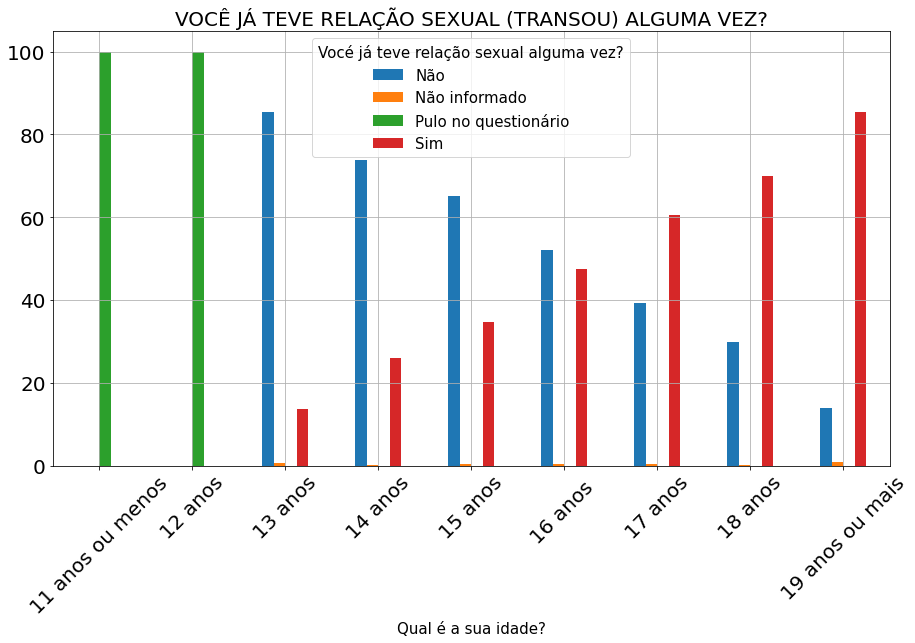

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01003', 'VB08001', 'index',
                         'Qual é a sua idade?',
                         'Vocé já teve relação sexual alguma vez?').plot(kind='bar', grid='True', figsize=(15, 8), fontsize=20, rot=45)
plt.title('VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?', fontsize=20)
plt.show()

##### 2.2.1.2.2 Idade da primeira relação sexual

In [ ]:
dados_amostra_2['VB08002'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08002',
                                                    'QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL (TRANSOU) PELA PRIMEIRA VEZ?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08002')
grafico_barras(_, 'VB08002', 
               'QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL PELA PRIMEIRA VEZ?',
               'Idade', '%')

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB08002', 'VB01001', 'index',
                         'Que idade você tinha quando fez sexo pela primeira vez?',
                         'Qual é o seu sexo?')

Qual é o seu sexo?,Feminino,Masculino
Que idade você tinha quando fez sexo pela primeira vez?,,
10 anos,5.1,94.9
11 anos,17.8,82.2
12 anos,25.0,75.0
13 anos,35.1,64.9
14 anos,43.9,56.1
15 anos,53.1,46.9
16 anos,51.8,48.2
17 anos,53.1,46.9
18 anos ou mais,58.9,41.1


Os estudantes do sexo masculino apresentam maior proporção entre os 9 anos ou menos até os 13 anos de idade da primeira relação sexual.

##### 2.2.1.2.3 Número de parceiros

In [ ]:
dados_amostra_2['VB08003A'] = altera_opcoes_resposta(dados_amostra_2,
                                                     dicionario_variaveis_amostra_2,
                                                     'VB08003A',
                                                     'NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08003A')
grafico_barras(_, 'VB08003A',
               'NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS?',
               'Pessoas', '%')

In [ ]:
print(f'''
Dos 26.9% que já tiveram relação sexual {round(100 - 73.09 - 9.68 - 0.1)}% declaram ter se
relacinado com mais de uma pessoa.
''') 


Dos 26.9% que já tiveram relação sexual 17% declaram ter se
relacinado com mais de uma pessoa.



In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01003', 'VB08003A', 'index',
                         'Qual é a sua idade?', 
                         'Com quantas pessoa você teve relações sexuais?')

Com quantas pessoa você teve relações sexuais?,1 pessoa,2 pessoas,3 pessoas,4 pessoas,5 pessoas,6 ou mais pessoas,Não informado,Pulo no questionário
Qual é a sua idade?,,,,,,,,
11 anos ou menos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
12 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
13 anos,5.6,2.9,1.6,1.1,0.5,1.8,0.3,86.2
14 anos,10.9,4.5,3.8,1.8,1.1,3.8,0.1,74.1
15 anos,13.9,6.8,3.9,2.8,1.6,5.4,0.2,65.4
16 anos,16.7,10.2,5.1,3.9,2.1,9.2,0.2,52.5
17 anos,21.9,9.8,7.4,5.3,2.5,13.2,0.3,39.5
18 anos,18.7,11.4,8.9,7.1,5.3,18.3,0.4,30.0
19 anos ou mais,18.6,8.6,11.9,8.3,5.8,32.1,0.0,14.7


Obs: Percentual calculado pela linha.

##### 2.2.1.2.4 Já engravidou

In [ ]:
dados_amostra_2['VB08013'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08013',
                                                    'ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08013')
grafico_pizza(_, 'VB08013',
              'ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?')

Já engravidou por idade

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01003', 'VB08013', 'all',
                         'Qual é a sua idade?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Pulo no questionário,Sim
Qual é a sua idade?,,,,
11 anos ou menos,0.0,0.0,12.5,0.0
12 anos,0.0,0.0,15.9,0.0
13 anos,0.5,0.0,14.9,0.0
14 anos,1.0,0.0,11.8,0.1
15 anos,2.0,0.0,12.6,0.1
16 anos,2.7,0.0,10.8,0.2
17 anos,2.5,0.0,6.6,0.2
18 anos,0.7,0.0,2.5,0.1
19 anos ou mais,0.4,0.0,1.3,0.5


Obs: Proporção calculada pela tabela.

In [ ]:
print(f'''
1.3% das estudantes que já engravidou alguma vez {round(0.2 + 0.2 + 0.2)}%
engravidou antes dos 18 anos de idade, representando {round(1 / 1.26 * 100)}% do 
total 

{0.1}% antes dos 15 anos de idade, representando {round(0.1 / 1.26 * 100)}% do total
que já engravidou.
''')


1.3% das estudantes que já engravidou alguma vez 1%
engravidou antes dos 18 anos de idade, representando 79% do 
total 

0.1% antes dos 15 anos de idade, representando 8% do total
que já engravidou.



Proporção de estudantes do sexo feminino e masculino por cor/ raça

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB01001', 'columns',
                         'Qual é a sua cor ou raça?', 
                         'Qual é seu sexo?')

Qual é seu sexo?,Feminino,Masculino
Qual é a sua cor ou raça?,,
Amarela,5.0,3.6
Branca,38.1,41.3
Indígena,3.3,3.7
Não informado,0.1,0.1
Parda,43.4,37.8
Preta,10.1,13.3


Obs: Proporção calculada pela coluna.

Já engravidou por cor/ raça

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB08013', 'index',
                         'Qual é a sua cor ou raça?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Pulo no questionário,Sim
Qual é a sua cor ou raça?,,,,
Amarela,11.7,0.0,86.8,1.5
Branca,9.3,0.0,90.1,0.6
Indígena,6.7,0.0,92.4,0.9
Não informado,0.0,0.0,100.0,0.0
Parda,10.3,0.0,87.8,1.8
Preta,9.3,0.1,88.9,1.7


Obs: Proporção calculada pela linha.

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB08013', 'columns',
                         'Qual é a sua cor ou raça?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Pulo no questionário,Sim
Qual é a sua cor ou raça?,,,,
Amarela,5.2,0.0,4.2,5.3
Branca,38.1,0.0,40.2,19.1
Indígena,2.4,0.0,3.6,2.4
Não informado,0.0,0.0,0.2,0.0
Parda,43.1,75.0,40.1,57.4
Preta,11.2,25.0,11.7,15.8


Obs: Proporção calculada pela coluna

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB08013', 'all',
                         'Qual é a sua cor ou raça?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Pulo no questionário,Sim
Qual é a sua cor ou raça?,,,,
Amarela,0.5,0.0,3.7,0.1
Branca,3.7,0.0,35.8,0.2
Indígena,0.2,0.0,3.2,0.0
Não informado,0.0,0.0,0.1,0.0
Parda,4.2,0.0,35.7,0.7
Preta,1.1,0.0,10.4,0.2


Obs: Proporção calculada pela tabela total (linhas e colunas)

As estudantes que se declararam de cor parda são as que tiveram maior proporção (sim/ não) das estudantes que já engravidaram alguma vez (1,8%), seguidas das estudantes de cor/ raça preta (1,7%) e amarela (1,5%).

Estudantes de cor branca são as que tiveram o menor proporção (sim/ não) das que já engravidaram alguma vez, mesmo representando 38.1% das estudantes do sexo feminino. 

Já engravidou por pretensão de escolaridade

In [ ]:
dados_amostra_2['VB01025'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB01025',
                                                    'QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?')

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01025', 'VB08013', 'columns',
                         'Qual o grau de escolaridade mais elevado você pretende concluir?', 
                         'Alguma vez na vida já engravidou?')

Alguma vez na vida já engravidou?,Não,Não informado,Pulo no questionário,Sim
Qual o grau de escolaridade mais elevado você pretende concluir?,,,,
Ensino Fundamental,2.9,25.0,8.9,1.9
Ensino Médio,8.6,25.0,10.0,15.3
Ensino Médio Técnico,4.3,0.0,3.9,4.3
Ensino Superior,17.9,0.0,15.2,18.7
Não informado,0.0,0.0,0.1,0.0
Não sei,11.6,0.0,21.1,15.8
Pós-graduação,54.7,50.0,40.8,44.0


Obs: Proporção calculada pela coluna

A gravidez aparentemente não influencia no grau de escolaridade que a estudante pretende concluir. 

Hipótese a ser testada: A distribuição do grau de escolaridade que se pretende concluir é a mesma das estudantes que já engravidaram para as estudantes que não engravidaram.

Por quê fazer esse teste? Para saber se a gravidez diminui a perspectiva de pretensão de escolaridade.

###### 2.2.1.2.4.1 Teste de hipótese

Hipótese nula $H_0$: A gravidez não diminui o grau de escolaridade pretendido.

Por quê fazer o teste: Para saber se há diferenças na perspectiva educacional dos dois grupos.

In [ ]:
#Dicionário para o grau de escolaridade seguir uma sequência crescente
dic_escolaridade_pretensao = {
    'Não sei': 0,
    'Não informado': 1,
    'Ensino Fundamental ': 2,
    'Ensino Médio': 3,
    'Ensino Médio Técnico': 4,
    'Ensino Superior': 5,
    'Pós-graduação': 6

}

In [ ]:
'''
DataFrame contendo as estudantes que já engravidaram e a respectiva pretensão 
de escolaridade
'''
pretensao_escolaridade_ja_engravidou = pd.DataFrame(dados_amostra_2.query('VB01001 == "Feminino" and VB08013 == "Sim"')['VB01025'])
pretensao_escolaridade_ja_engravidou['VB01025'] = pretensao_escolaridade_ja_engravidou['VB01025'].map(dic_escolaridade_pretensao) 

In [ ]:
'''
DataFrame contendo as estudantes que não engravidaram e a respectiva pretensão 
de escolaridade

obs: Amostra do mesmo tamanho da distribuição das estudantes que já engravidaram
'''
pretensao_escolaridade_nunca_engravidou = pd.DataFrame(dados_amostra_2.query('VB01001 == "Feminino" and VB08013 == "Não"')['VB01025'].sample(n=209, random_state=7))
pretensao_escolaridade_nunca_engravidou['VB01025'] = pretensao_escolaridade_nunca_engravidou['VB01025'].map(dic_escolaridade_pretensao) 

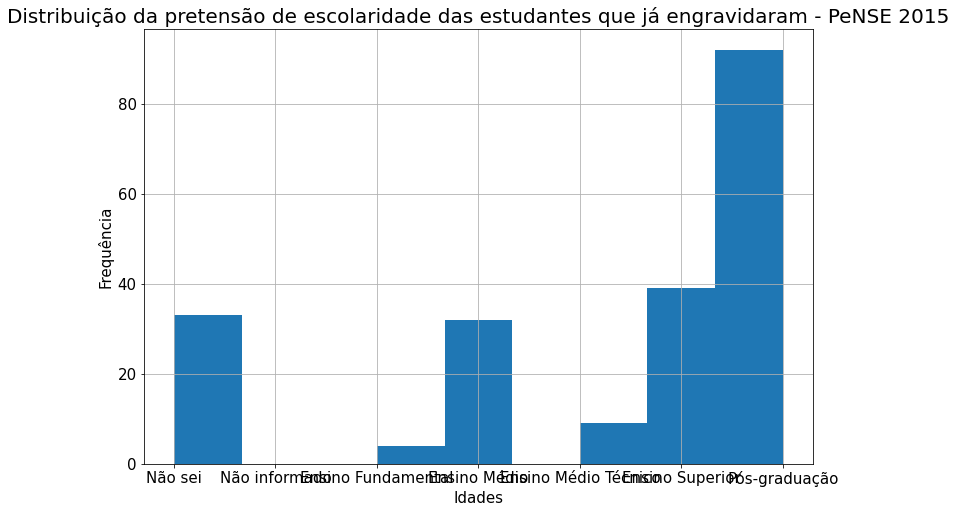

In [ ]:
pretensao_escolaridade_ja_engravidou['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade das estudantes que já engravidaram - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

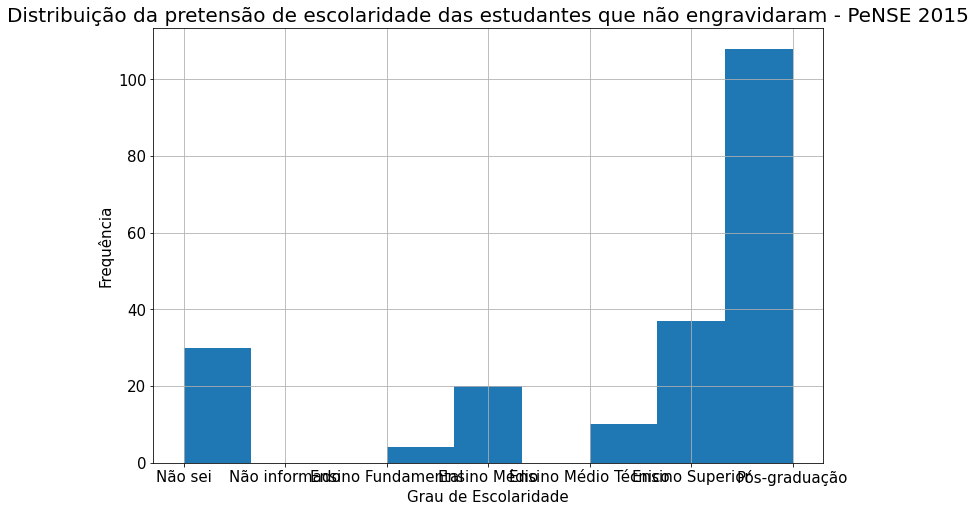

In [ ]:
pretensao_escolaridade_nunca_engravidou['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade das estudantes que não engravidaram - PeNSE 2015', fontsize=20)
plt.xlabel('Grau de Escolaridade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

Graficamente trata se de distribuições iguais.



---


Teste de distribuição não paramêtrico - $Ranksums$

In [ ]:
_, p_value = ranksums(pretensao_escolaridade_ja_engravidou['VB01025'],
                      pretensao_escolaridade_nunca_engravidou['VB01025'])

In [ ]:
print(f'P-value do teste de distribuição da idade e pretensão de escolaridade: {round(p_value, 2)}')

P-value do teste de distribuição da idade e pretensão de escolaridade: 0.14


In [ ]:
p_value < 0.05

False

P-value é maior do que 0.05, logo a hipótese nula (ambas as distribuições são iguais) deve ser aceita, deste modo a distribuição da pretensão de escolaridade das estudantes que já engravidaram alguma vez e das que nunca engravidaram é a mesma. 

**Estatisticamente a gravidez não altera a pretensão do grau de escolaridade.**

#### 2.2.1.3 Prevenção à gravidez e DST's

##### 2.2.1.3.1 Uso de preservativo na primeira relação sexual

In [ ]:
dados_amostra_2['VB08011'] = altera_opcoes_resposta(dados_amostra_2, 
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08011',
                                                    'VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08011')
grafico_pizza(_, 'VB08011', 
              'VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 26,9% que já tiveram relação sexual 9.4% não usaram preservativo na primeira 
relação sexual.

Representando {round(9.4 / 26.9 * 100)}% do total que já tiveram relação sexual.
''')


Dos 26,9% que já tiveram relação sexual 9.4% não usaram preservativo na primeira 
relação sexual.

Representando 35% do total que já tiveram relação sexual.



In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB08011', 'VB01001', 'index',
                         'Usou preservativo na primeira relação sexual?',
                         'Qual é o seu sexo?')

Qual é o seu sexo?,Feminino,Masculino
Usou preservativo na primeira relação sexual?,,
Não,33.2,66.8
Não informado,40.0,60.0
Pulo no questionário,53.3,46.7
Sim,45.1,54.9


Estudantes do sexo masculino apresentam maior proporção do não uso de preservativo na primeira relação sexual comparado as estudantes do sexo feminino.

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'REGEOGR', 'VB08011', 'columns',
                         'Usou preservativo na primeira relação sexual?',
                         'Região Geográfica')

Região Geográfica,Não,Não informado,Pulo no questionário,Sim
Usou preservativo na primeira relação sexual?,,,,
Centro-Oeste,16.6,13.3,21.7,18.5
Nordeste,23.1,20.0,21.2,18.6
Norte,22.1,33.3,18.8,19.4
Sudeste,20.9,13.3,19.7,19.7
Sul,17.4,20.0,18.6,23.7


Obs: Proporção calculada pela coluna.

As regiões Centro-Oeste e Sul apresentam menor proporção dos estudantes que não utilizaram preservativo na primeira relação sexual, e as regiões Nordeste e Norte maior proporção do não uso de preservativo na primeira relação sexual.

##### 2.2.1.3.2 Orientação sobre prevenção de gravidez

In [ ]:
dados_amostra_2['VB08008'] = altera_opcoes_resposta(dados_amostra_2, 
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08008', 
                                                    'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08008')
grafico_barras(_, 'VB08008', 'NA ESCOLA, RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?',
               'Respostas', '%')

In [ ]:
print(f'''
52.5% recebeu orientação na escola sobre prevenção de gravidez, {round(13.99 + 4.78, 1)}%
não recebeu ou não soube dizer.
''')


52.5% recebeu orientação na escola sobre prevenção de gravidez, 18.8%
não recebeu ou não soube dizer.



In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'REGEOGR', 'VB08008', 'index',
                         'Na escola, recebeu orientação sobre prevenção de gravidez',
                         'Região Geográfica')

Região Geográfica,Não,Não informado,Não sei,Pulo no questionário,Sim
"Na escola, recebeu orientação sobre prevenção de gravidez",,,,,
Centro-Oeste,11.6,0.4,4.1,29.8,54.1
Nordeste,15.8,0.1,4.5,27.9,51.7
Norte,16.2,0.3,5.1,25.0,53.4
Sudeste,15.0,0.2,4.6,31.3,49.0
Sul,11.3,0.5,5.7,28.0,54.5


Obs: Proporção calculada pela linha.

##### 2.2.1.3.3 Recebeu orientação na escola sobre doenças sexualmente transmissíveis

In [ ]:
dados_amostra_2['VB08009'] = altera_opcoes_resposta(dados_amostra_2, 
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08009',
                                                    'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08009')
grafico_barras(_, 'VB08009', 'NA ESCOLA, RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DST"s?',
               'Respostas', '%')

In [ ]:
print('58.8% recebeu orientação na escola sobre AIDS e DST\'s')

58.8% recebeu orientação na escola sobre AIDS e DST's


In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB08009', 'VB01001', 'columns', 
                         'Na escola, recebeu orientação sobre AIDS e DST\'s?',
                         'Qual é o seu sexo?')

Qual é o seu sexo?,Feminino,Masculino
"Na escola, recebeu orientação sobre AIDS e DST's?",,
Não,8.1,10.1
Não informado,0.2,0.4
Não sei,2.8,3.8
Pulo no questionário,29.9,26.9
Sim,59.0,58.7


Obs: Percentual calculado pela coluna.

##### 2.2.1.3.4 Recebeu orientação sobre como conseguir preservativo gratuitamente

In [ ]:
dados_amostra_2['VB08010'] = altera_opcoes_resposta(dados_amostra_2, 
                                          dicionario_variaveis_amostra_2,
                                          'VB08010',
                                          'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE COMO CONSEGUIR CAMISINHA (PRESERVATIVO) GRATUITAMENTE? ')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08010')
grafico_barras(_, 'VB08010', 
              'NA ESCOLA, FOI ORIENTADO A COMO CONSEGUIR PRESERVATIVO GRATUITAMENTE? ',
               'Respostas', '%')

In [ ]:
print(f'''
Menos da metade da amostra (46,8%) foi orientado a como conseguir preservativo 
gratuitamente, pouco menos de 1/4 ({round(19.62 + 4.8, 1)}%) não foi orientado ou não soube dizer.''')


Menos da metade da amostra (46,8%) foi orientado a como conseguir preservativo 
gratuitamente, pouco menos de 1/4 (24.4%) não foi orientado ou não soube dizer.


In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB08010', 'VB01001', 'columns',
                         'Na escola, recebeu orientação de como conseguir preservativo gratuitamente?',
                         'Qual é o seu sexo?')

Qual é o seu sexo?,Feminino,Masculino
"Na escola, recebeu orientação de como conseguir preservativo gratuitamente?",,
Não,18.9,20.4
Não informado,0.3,0.5
Não sei,4.8,4.8
Pulo no questionário,29.9,26.9
Sim,46.2,47.4


A orientação como esperada foi direcionada para ambos os sexos.

Obs: Proporção calculada pela coluna

##### 2.2.1.3.5 Utilizou algum método para evitar a gravidez na última relação sexual

In [ ]:
dados_amostra_2['VB08005'] = altera_opcoes_resposta(dados_amostra_2, 
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08005',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08005')
grafico_barras(_, 'VB08005',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ/ DST\'s',
               'Respostas', '%')

In [ ]:
print(f'''
18% utilizou de algum método para evitar a gravidez e/ou DST\'s na última
relação sexual, representando {round(18.08 / 26.9 * 100)}% dos estudantes que já tiveram
relação sexual.

{round(6.2 + 2.51, 1)}% não usou ou não soube dizer.
''')


18% utilizou de algum método para evitar a gravidez e/ou DST's na última
relação sexual, representando 67% dos estudantes que já tiveram
relação sexual.

8.7% não usou ou não soube dizer.



##### 2.2.1.3.6 Uso de preservativo na última relação sexual

In [ ]:
dados_amostra_2['VB08006'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08006',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU CAMISINHA (PRESERVATIVO)?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08006')
grafico_barras(_, 'VB08006',
              'NA ÚLTIMA RELAÇÃO SEXUAL, VOCÊ OU SEU(SUA) PARCEIRO(A) USOU PRESERVATIVO?',
               'Respostas', '%')

In [ ]:
print(f'''
17.3% afirmou utilizar preservativo na última relação sexual representando {round(17.3 / 26.9 * 100)}% 
dos estudantes que já tiveram relação sexual.


{round(8.58 + 0.89, 1)}% não utilizou ou não soube dizer. 
''')


17.3% afirmou utilizar preservativo na última relação sexual representando 64% 
dos estudantes que já tiveram relação sexual.


9.5% não utilizou ou não soube dizer. 



##### 2.2.1.3.7 Uso de outro método na última relação sexual

In [ ]:
dados_amostra_2['VB08007'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08007',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08007')
grafico_barras(_, 'VB08007',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?',
              'Respostas', '%')

In [ ]:
print(f'''
Mais da metade ({round(12.54 + 2.76, 1)}%, desconsiderando as respostas pulo no questionário) não 
fez uso de outro método para evitar gravidez além do preservativo, 11.4% fez uso 
de algum outro método representando {round(11.4 / 26.9 * 100)}% dos estudantes que já tiveram
relação sexual.
''')


Mais da metade (15.3%, desconsiderando as respostas pulo no questionário) não 
fez uso de outro método para evitar gravidez além do preservativo, 11.4% fez uso 
de algum outro método representando 42% dos estudantes que já tiveram
relação sexual.



Método utilizado

In [ ]:
dados_amostra_2['VB08012'] = altera_opcoes_resposta(dados_amostra_2,
                                                    dicionario_variaveis_amostra_2,
                                                    'VB08012',
                                                    'NESTA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB08012')
grafico_barras(_, 'VB08012',
               'NESTA ÚLTIMA RELAÇÃO SEXUAL, QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?',
               'Método', '%')

In [ ]:
print(f'''
Dos 11.4% que fez uso de outro método além do preservativo para evitar a gravidez
7.6% fez uso da pílula anticoncepcional.

Representando {round(7.6 / 11.4 * 100)}% do total que fez uso de outro método.
''')


Dos 11.4% que fez uso de outro método além do preservativo para evitar a gravidez
7.6% fez uso da pílula anticoncepcional.

Representando 67% do total que fez uso de outro método.



In [ ]:
print(f'''
Em média houveram {round(np.mean([73.1, 28.42, 28.42, 28.42, 73.09, 73.09, 73.09]))}% de respostas pulo no questionário relacionado as questões 
de prevenção à graviez e DST\'s.
''')


Em média houveram 54% de respostas pulo no questionário relacionado as questões 
de prevenção à graviez e DST's.



#### 2.2.1.4 Violência sexual

##### 2.2.1.4.1 Foi forçado a ter relação sexual

In [ ]:
dados_amostra_2['VB09016'] = altera_opcoes_resposta(dados_amostra_2,
                                          dicionario_variaveis_amostra_2,
                                          'VB09016',
                                          'ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL? ')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB09016')
grafico_pizza(_, 'VB09016',
              'ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL?')

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01002', 'VB09016', 'index',
                         'Qual é a sua cor ou raça?',
                         'Alguma vez na vida você foi forçado a ter relação sexual?')

Alguma vez na vida você foi forçado a ter relação sexual?,Não,Não informado,Pulo no questionário,Sim
Qual é a sua cor ou raça?,,,,
Amarela,65.2,0.4,30.9,3.5
Branca,66.7,0.3,30.1,2.9
Indígena,54.6,0.7,40.4,4.3
Não informado,34.8,4.3,60.9,0.0
Parda,70.1,0.5,25.8,3.5
Preta,67.4,1.1,26.9,4.7


Obs: Proporção calculada pela linha.

As pessoas que se declararam de cor/ raça indígena e preta foram os que tiveram maior proporção (proporção respostas sim/ não) entre os estudantes que já foram forçados a ter relação sexual.

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01001', 'VB09016', 'all',
                         'Qual é o seu sexo?',
                         'Alguma vez na vida você foi forçado a ter relação sexual?')

Alguma vez na vida você foi forçado a ter relação sexual?,Não,Não informado,Pulo no questionário,Sim
Qual é o seu sexo?,,,,
Feminino,33.0,0.1,14.9,1.9
Masculino,34.6,0.4,13.5,1.5


Obs: Proporção calculada pela tabela total (linhas e colunas).

Os estudantes de sexo feminino foram as que mais foram forçadas a ter relação sexual (1,9%), os estudantes de sexo masculino tiveram maior proporção em não informado (0,4%).

In [ ]:
tabela_cruzada_proporcao(dados_amostra_2, 'VB01025', 'VB09016', 'columns',
                         'Qual o grau de escolaridade mais elevado que você pretente concluir?',
                         'Alguma vez na vida você foi forçado a ter relação sexual?')

Alguma vez na vida você foi forçado a ter relação sexual?,Não,Não informado,Pulo no questionário,Sim
Qual o grau de escolaridade mais elevado que você pretente concluir?,,,,
Ensino Fundamental,5.1,12.8,15.8,8.3
Ensino Médio,9.7,14.0,10.2,11.6
Ensino Médio Técnico,4.2,3.5,3.2,5.1
Ensino Superior,16.4,15.1,13.4,14.2
Não informado,0.0,3.5,0.1,0.0
Não sei,18.2,27.9,24.8,17.2
Pós-graduação,46.4,23.3,32.4,43.6


Obs: Proporção calculada pela coluna.

Visualmente os estudantes que foram forçados a ter relação sexual não tem perspectiva diferente do grau de escolaridade que pretende concluir comparado aos outros estudantes.

###### 2.2.1.4.1.1 Teste de hipótese
Hipótese nula $H_0$: Os estudantes que foram forçados a ter relação sexual tem a mesma pretensão do grau de escolaridade comparado aos demais estudantes.

Premissa 1: Quanto maior o grau de escolaridade pretendido maior o nível de auto-responsabilidade e motivação do estudante com relação a sua formação/ capacitação educacional.

Por quê fazer o teste: Para saber se há diferenças na perspectiva educacional dos dois grupos.

In [ ]:
'''
DataFrame contendo as estudantes que form forçados a ter relação sexual e a 
respectiva pretensão de escolaridade
'''
pretensao_escolaridade_sexo_forcado = pd.DataFrame(dados_amostra_2.query('VB09016 == "Sim"')['VB01025'])
pretensao_escolaridade_sexo_forcado['VB01025'] = pretensao_escolaridade_sexo_forcado['VB01025'].map(dic_escolaridade_pretensao) 

In [ ]:
'''
DataFrame contendo as estudantes que não foram forçados a ter relação sexual e a 
respectiva pretensão de escolaridade

Obs: Amostra do mesmo tamanho dos estudantes que foram forçados a ter relação 
sexual
'''
pretensao_escolaridade_nao_forcado = pd.DataFrame(dados_amostra_2.query('VB09016 == "Não"')['VB01025'].sample(n=569, random_state=7))
pretensao_escolaridade_nao_forcado['VB01025'] = pretensao_escolaridade_nao_forcado['VB01025'].map(dic_escolaridade_pretensao) 

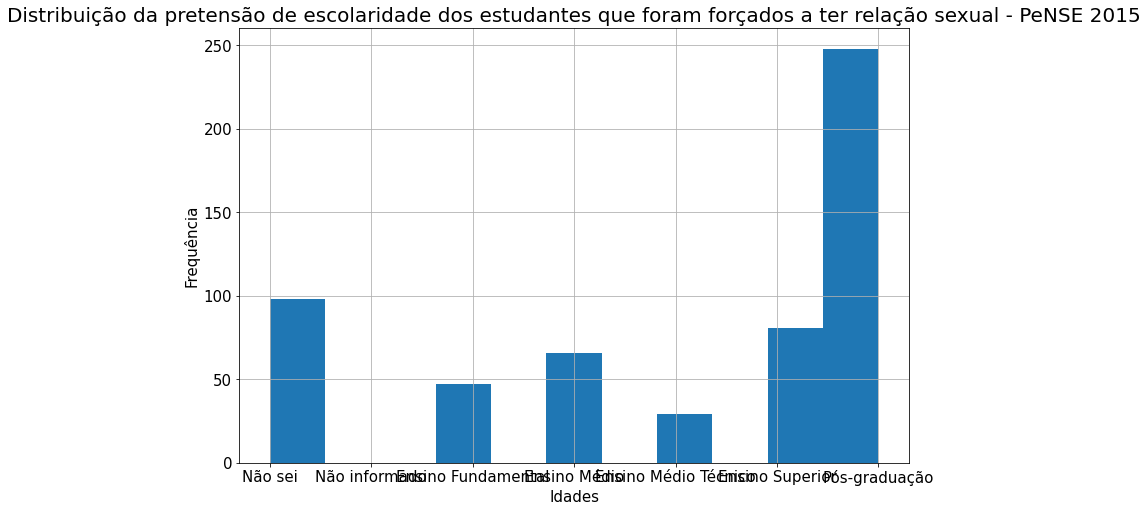

In [ ]:
pretensao_escolaridade_sexo_forcado['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade dos estudantes que foram forçados a ter relação sexual - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

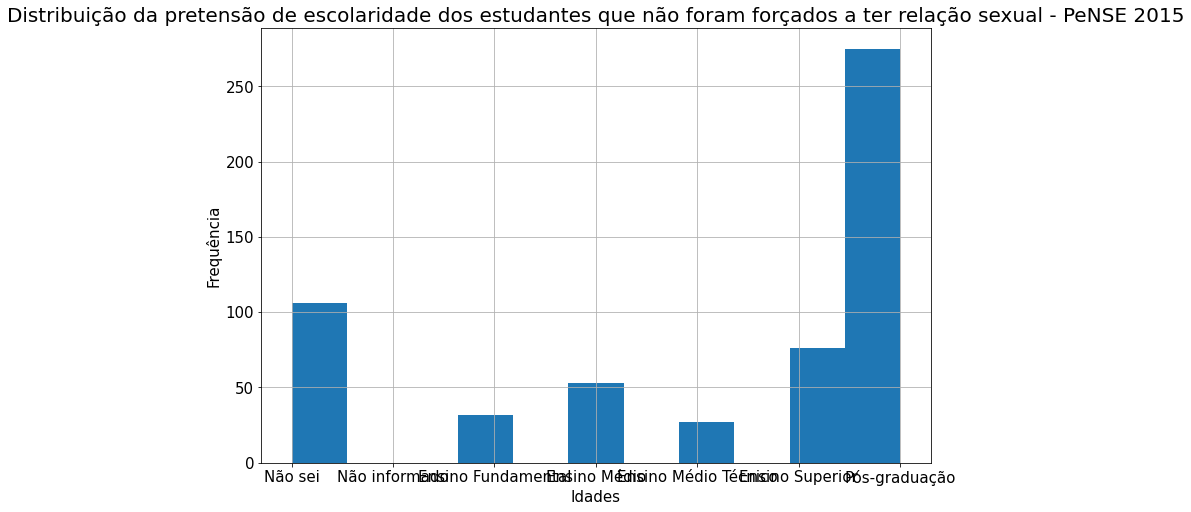

In [ ]:
pretensao_escolaridade_nao_forcado['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade dos estudantes que não foram forçados a ter relação sexual - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

Graficamente as distribuições são iguais.



---



Teste não paramétrico: $Ranksums$

In [ ]:
_, p_value = ranksums(pretensao_escolaridade_sexo_forcado,
                      pretensao_escolaridade_nao_forcado)

In [ ]:
print('P-value:', round(p_value, 2))

P-value: 0.25


In [ ]:
p_value < 0.05

False

P-value maior do que 0,05 a hipótes nula deve ser aceita.

**Estatisticamente os estudantes que foram forçados a ter relação sexual não aumentaram ou diminuíram o grau de escolaridade pretendido comparado aos estudantes que não foram forçados.**

Os teste não comprova causalidade, pois há outras variáveis de natureza social que devem ser avaliadas.

##### 2.2.1.4.2 Namorado(a)/ ex-namorado(a) forçou relação sexual


In [ ]:
dados_amostra_2['VB0901701'] = altera_opcoes_resposta(dados_amostra_2,
                                            dicionario_variaveis_amostra_2,
                                            'VB0901701',
                                            'UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901701')
grafico_pizza(_, 'VB0901701',
              'UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 3.4% que foram forçados a ter relação sexual 1% afirmam que o responsável 
tenha sido um(a) namorado(a)/ex-namorado(a)..

Representando {round(1.05 / 3.44 * 100)}% dos responsáveis pelo abuso.

''')


Dos 3.4% que foram forçados a ter relação sexual 1% afirmam que o responsável 
tenha sido um(a) namorado(a)/ex-namorado(a)..

Representando 31% dos responsáveis pelo abuso.




##### 2.2.1.4.3 Um(a) amigo(a) forçou você a ter relação sexual


In [ ]:
dados_amostra_2['VB0901702'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901702',
                                                      'UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901702')
grafico_pizza(_, 'VB0901702',
              'UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 3.4% que foram forçados a ter relação sexual 0.7% afirmam que o respnsável 
tenha sido um(a) amigo(a).

Representando {round(0.72 / 3.44 * 100)}% dos responsáveis pelo abuso.
''')


Dos 3.4% que foram forçados a ter relação sexual 0.7% afirmam que o respnsável 
tenha sido um(a) amigo(a).

Representando 21% dos responsáveis pelo abuso.



##### 2.2.1.4.4 Seu pai/mãe/padastro/madastra fourçou a ter relação sexual

In [ ]:
dados_amostra_2['VB0901703'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901703',
                                                      'SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901703')
grafico_pizza(_, 'VB0901703',
              'SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 3.4% que foram forçados a ter relação sexual 0.4% afirmam que o respnsável tenha sido o pai/mãe/padrasto/madrasta.

In [ ]:
print(f'''
Dos 3.4% que foram forçados a ter relação sexual 0.4% afirmam que o respnsável 
tenha sido o pai/mãe/padrasto/madrasta.

Representando {round(0.41 / 3.44 * 100)}% dos responsáveis pelo abuso.
''')


Dos 3.4% que foram forçados a ter relação sexual 0.4% afirmam que o respnsável 
tenha sido o pai/mãe/padrasto/madrasta.

Representando 12% dos responsáveis pelo abuso.



##### 2.2.1.4.5 Outros familiares forçaram você a ter relação sexual

In [ ]:
dados_amostra_2['VB0901704'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901704',
                                                      'OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901704')
grafico_pizza(_, 'VB0901704',
              'OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

Dos 3,4% que foram forçados a ter relação sexual 0,6% afirmam que o respnsável tenha sido outro membro da família.

In [ ]:
print(f'''
Dos 3,4% que foram forçados a ter relação sexual 0,6% afirmam que o respnsável 
tenha sido outro membro da família.

Representando {round(0.57 / 3.44 * 100)}% dos responsáveis pelo abuso.
''')


Dos 3,4% que foram forçados a ter relação sexual 0,6% afirmam que o respnsável 
tenha sido outro membro da família.

Representando 17% dos responsáveis pelo abuso.



In [ ]:
print(f'''
Dos 3,4% que foram forçados a ter relação sexual {round(0.41 + 0.57, 1)}% afirmam
que o responsável tenha  sido um familiar.

Representando {round(0.57 / 3.44 * 100)}% dos responsáveis pelo abuso.
''')


Dos 3,4% que foram forçados a ter relação sexual 1.0% afirmam
que o responsável tenha  sido um familiar.

Representando 17% dos responsáveis pelo abuso.



##### 2.2.1.4.6 Um(a) desconhecido(a) forçou você a ter relação sexual

In [ ]:
dados_amostra_2['VB0901705'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901705',
                                                      'UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901705')
grafico_pizza(_, 'VB0901705',
              'UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 3.4% que foram forçados a ter relação sexual 0.5% afirmam que o respnsável 
tenha sido um(a) desconhecido(a).

Representando {round(0.51 / 3.44 * 100)}% dos responsáveis pelo abuso.

''')


Dos 3.4% que foram forçados a ter relação sexual 0.5% afirmam que o respnsável 
tenha sido um(a) desconhecido(a).

Representando 15% dos responsáveis pelo abuso.




##### 2.2.1.4.7 Outras pessoa forçaram você a ter relação sexual

In [ ]:
dados_amostra_2['VB0901706'] = altera_opcoes_resposta(dados_amostra_2,
                                                      dicionario_variaveis_amostra_2,
                                                      'VB0901706',
                                                      'OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_2, 'VB0901706')
grafico_pizza(_, 'VB0901706',
              'OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 3.4% que foram forçados a ter relação sexual 0.4% afirmam que o respnsável 
tenha sido outras pessoas (diferente do que já foi perguntado).

Representando {round(0.42 / 3.44 * 100)}% dos responsáveis pelo abuso.
''')


Dos 3.4% que foram forçados a ter relação sexual 0.4% afirmam que o respnsável 
tenha sido outras pessoas (diferente do que já foi perguntado).

Representando 12% dos responsáveis pelo abuso.



In [ ]:
print(f'''
Dos 3.4% que foram forçados a ter relação sexual aproximadamente {round(1.05 + 0.72 + 0.42 + 0.57)}% afirmam
que o responsável tenha  sido um familiar ou pessoa conhecida (pai/mãe/padrasto/
madrasta, familiar, namorado(a)/ex-namorado(a), amigo(a)).

Representando {round(2.7 / 3.44 * 100)}% dos responsáveis pelo abuso.


0.5% tiveram mais de um(a) abusado(a).
''')


Dos 3.4% que foram forçados a ter relação sexual aproximadamente 3% afirmam
que o responsável tenha  sido um familiar ou pessoa conhecida (pai/mãe/padrasto/
madrasta, familiar, namorado(a)/ex-namorado(a), amigo(a)).

Representando 78% dos responsáveis pelo abuso.


0.5% tiveram mais de um(a) abusado(a).



### 2.2.2 Explorando a amostra 1

"Escolares do 9º ano do ensino fundamental (antiga 8ª série) das escolas públicas e privadas dos Municípios das Capitais constituíram sua população-alvo." (IBGE)

In [ ]:
#Primeiros registros
dados_amostra_1.head(3)

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,2,7,1,2,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,3,4,5,8,2,5,3,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,2,5,1,1,7,3,2,-1,1,1,1,1,1,1,3,1,4,1,1,2,5,3,8,3,8,8,7,2,1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,10,7,1,1,7,4,2,-1,2,1,1,1,1,2,4,1,4,1,2,2,6,3,1,6,4,3,1,5,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,3,1,1787


In [ ]:
'''
(linhas, colunas)
linhas: Número de respondentes
colunas: Número de perguntas
'''
dados_amostra_1.shape

(102072, 293)

Traduzindo a condificação das respostas

In [ ]:
dados_amostra_1['VB01001'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01001', 
                                                    'QUAL É O SEU SEXO?')

In [ ]:
dados_amostra_1['VB01002'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01002',
                                                    'QUAL É A SUA COR OU RAÇA?')

In [ ]:
dados_amostra_1['REGEOGR'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'REGEOGR',
                                                    'REGIÃO GEOGRÁFICA')

In [ ]:
dados_amostra_1['UFCENSO'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'UFCENSO', 
                                                    'UNIDADE DA FEDERAÇÃO')

In [ ]:
dados_amostra_1['VB01021'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01021',
                                                    'EM QUE ANO/SÉRIE VOCÊ ESTÁ?')

In [ ]:
dados_amostra_1['VB01022'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01022',
                                                    'EM QUE TURNO VOCÊ ESTUDA?')

In [ ]:
dados_amostra_1['VB01005'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01005',
                                                    'EM QUE ANO VOCÊ NASCEU?')

In [ ]:
dados_amostra_1['VB01003'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01003',
                                                    'QUAL É A SUA IDADE?')



---



Visualização das tabelas de frequência

In [ ]:
tabela_frequencia(dados_amostra_1, 'VB01001', 
                  'Qual é o seu sexo?')

,Frequência,Proporção %
Qual é o seu sexo?,,
Feminino,52782,51.7
Masculino,49290,48.3


Houve um controle na divisão da amostra entre os sexos

In [ ]:
tabela_frequencia(dados_amostra_1, 'VB01003',
                  'Qual é a sua idade?')

,Frequência,Proporção %
Qual é a sua idade?,,
14 anos,51611,50.6
15 anos,20864,20.4
13 anos,16722,16.4
16 anos,7873,7.7
17 anos,3040,3.0
18 anos,852,0.8
19 anos ou mais,572,0.6
12 anos,510,0.5
11 anos ou menos,28,0.0


Pouco mais da metada da amostra tem 14 anos de idade.

In [ ]:
tabela_frequencia(dados_amostra_1, 'VB01005',
                  'Em que ano você nasceu?')

,Frequência,Proporção %
Em que ano você nasceu?,,
2000,38991,38.2
2001,38903,38.1
1999,13590,13.3
1998,5088,5.0
2002,2575,2.5
1997,1800,1.8
1996,563,0.6
Antes de 1996,408,0.4
2004 ou mais,64,0.1


In [ ]:
tabela_frequencia(dados_amostra_1, 'VB01021',
                  'Em que ano/ série você estuda?')

,Frequência,Proporção %
Em que ano/ série você estuda?,,
9º ano / 8ª série do Ensino Fundamental,100497,98.5
8º ano / 7ª série do Ensino Fundamental,1247,1.2
1º ano Ensino Médio,124,0.1
3º ano Ensino Médio,50,0.0
6º ano / 5ª série do Ensino Fundamental,43,0.0
2º ano Ensino Médio,39,0.0
7º ano / 6ª série do Ensino Fundamental,37,0.0
Não informado,35,0.0


98,5% da amostra estuda no 9º ano (8ª série).

In [ ]:
tabela_frequencia(dados_amostra_1, 'VB01022',
                  'Em que turno você estuda?')

,Frequência,Proporção %
Em que turno você estuda?,,
Manhã,62891,61.6
Tarde,37144,36.4
Integral,1742,1.7
Intermediário,178,0.2
Noite,87,0.1
Não informado,30,0.0


Mais da metade (61.6%) estuda no turno da manhã e pouco mais de 1/3 (36.4%) estuda no turno da tarde.

In [ ]:
tabela_frequencia(dados_amostra_1, 'VB01002',
                  'Qual a sua cor ou raça?')

,Frequência,Proporção %
Qual a sua cor ou raça?,,
Parda,46935,46.0
Branca,33775,33.1
Preta,12849,12.6
Amarela,4580,4.5
Indígena,3825,3.7
Não informado,108,0.1


In [ ]:
print(f'{46 + 33.1}% da amostra se declararam de cor/ raça parda ou branca.')

79.1% da amostra se declararam de cor/ raça parda ou branca.


In [ ]:
tabela_frequencia(dados_amostra_1, 'REGEOGR',
                  'Região Geográfica')

,Frequência,Proporção %
Região Geográfica,,
Nordeste,36334,35.6
Norte,23937,23.5
Sudeste,17772,17.4
Centro-Oeste,14179,13.9
Sul,9850,9.7


In [ ]:
print(f'''
As regiões Nordeste e Norte representam {35.6 + 23.5}% da amostra, a maior participação 
dessas regiões se justifica pelo número de estados superior às demais regiões.''')


As regiões Nordeste e Norte representam 59.1% da amostra, a maior participação 
dessas regiões se justifica pelo número de estados superior às demais regiões.


In [ ]:
_ = tabela_frequencia(dados_amostra_1, 'UFCENSO', 'Unidade da Federação')
_

,Frequência,Proporção %
Unidade da Federação,,
Goiás,5359,5.3
Minas Gerais,5258,5.2
Paraíba,4794,4.7
Espirito Santo,4586,4.5
Pernambuco,4537,4.4
Rio Grande do Norte,4358,4.3
Rio de Janeiro,4251,4.2
Maranhão,4028,3.9
Amapá,4014,3.9


In [ ]:
print(f'''
Houve um controle da distribuição da amostra nas unidades da federação, onde
a média percentual é de {round(_['Proporção %'].mean(), 1)}% e o desvio padrão de {round(_['Proporção %'].std(), 1)}% entre os estados e o 
Distrito Federal.''')


Houve um controle da distribuição da amostra nas unidades da federação, onde
a média percentual é de 3.7% e o desvio padrão de 0.7% entre os estados e o 
Distrito Federal.


#### 2.2.2.1 Perguntas do dicionário de *variáveis*

In [ ]:
for i in dicionario_variaveis_amostra_1.keys():
  print(i)

ANO EM QUE A PESQUISA FOI REALIZADA
PAÍS
REGIÃO GEOGRÁFICA
UNIDADE DA FEDERAÇÃO
MUNICÍPIO
INDICADORA DE MUNICÍPIO DA CAPITAL
PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?
QUAL É O SEU SEXO?
QUAL É A SUA COR OU RAÇA?
QUAL É A SUA IDADE?
QUAL É O MÊS DO SEU ANIVERSÁRIO?
EM QUE ANO VOCÊ NASCEU?
EM QUE ANO/SÉRIE VOCÊ ESTÁ?
EM QUE TURNO VOCÊ ESTUDA?
VOCÊ ESTUDA EM REGIME INTEGRAL (TEM ATIVIDADES ESCOLARES POR 7 HORAS OU MAIS HORAS DIÁRIAS, DURANTE TODO O PERÍODO ESCOLAR)?
VOCÊ ESTUDA EM REGIME DE INTERNATO (A ESCOLA POSSUI ALOJAMENTO ONDE OS ALUNOS PERMANECEM E DORMEM DIARIAMENTE, DURANTE TODO O PERÍODO ESCOLAR)?
QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?
QUANDO TERMINAR O CICLO/CURSO QUE VOCÊ ESTÁ FREQUENTANDO ATUALMENTE, VOCÊ PRETENDE?
VOCÊ MORA COM SUA MÃE?
VOCÊ MORA COM SEU PAI?
CONTANDO COM VOCÊ, QUANTAS PESSOAS MORAM NA SUA CASA OU APARTAMENTO?
NA SUA CASA TEM TELEFONE FIXO (CONVENCIONAL)?
VOCÊ TEM CELULAR?
NA SUA CASA TEM COMPUTADOR (DE M

#### 2.2.2.2 Perguntas relacionadas a saúde sexual

VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?

QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL (TRANSOU) PELA PRIMEIRA VEZ?

VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?

NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU CAMISINHA (PRESERVATIVO)?

NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)

NESTA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?

ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?

NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?

NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)?

NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE COMO CONSEGUIR CAMISINHA (PRESERVATIVO) GRATUITAMENTE?

ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL? 

UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?

UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?

OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?

##### 2.2.2.2.1 Constrangimento com o questionário

In [ ]:
dados_amostra_1['VB16001A08'] = altera_opcoes_resposta(dados_amostra_1,
                                                       dicionario_variaveis_amostra_1,
                                                       'VB16001A08',
                                                       'VOCÊ ACHOU ESTE QUESTIONÁRIO CONSTRANGEDOR?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB16001A08')
grafico_pizza(_, 'VB16001A08', 'VOCÊ ACHOU ESTE QUESTIONÁRIO CONSTRANGEDOR?')

98% não se sentiram constrangidos com o questionário.

#### 2.2.2.3 Relação Sexual

##### 2.2.2.3.1 Já teve relação sexual

In [ ]:
dados_amostra_1['VB08001'] = altera_opcoes_resposta(
    dados_amostra_1, dicionario_variaveis_amostra_1, 'VB08001',
    'VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?'
) 

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08001')
grafico_pizza(_, 'VB08001',
              'VOCÊ JÁ TEVE RELAÇÃO SEXUAL (TRANSOU) ALGUMA VEZ?')

In [ ]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB01003', 'VB08001', 'columns', 
                         'Qual é a sua idade?',
                         'Você já teve relação sexual?')

Você já teve relação sexual?,Não,Não informado,Sim
Qual é a sua idade?,,,
11 anos ou menos,0.0,0.8,0.0
12 anos,0.6,0.6,0.1
13 anos,20.3,10.3,6.6
14 anos,55.6,41.5,37.8
15 anos,16.6,24.5,30.1
16 anos,4.6,11.7,15.5
17 anos,1.5,5.5,6.6
18 anos,0.4,2.2,1.9
19 anos ou mais,0.3,3.0,1.3


Obs: Proporção calculada pela coluna.

In [ ]:
print(f'''
Dos 28% que já tiveram relação sexual {37.8 + 30.1}% tem 14 ou 15 anos de idade.
''')


Dos 28% que já tiveram relação sexual 67.9% tem 14 ou 15 anos de idade.



In [ ]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB01001', 'VB08001', 'columns', 
                         'Qual é o seu sexo?', 
                         'Você já teve relação sexual alguma vez?')

Você já teve relação sexual alguma vez?,Não,Não informado,Sim
Qual é o seu sexo?,,,
Feminino,57.9,30.4,36.3
Masculino,42.1,69.6,63.7


Dos 28% que já tiveram relação sexual os estudantes do sexo masculino representam 63,7% da amostra.

##### 2.2.2.3.2 Idade da primeira relação sexual

In [ ]:
dados_amostra_1['VB08002'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08002', 
                                                    'QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL (TRANSOU) PELA PRIMEIRA VEZ?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08002')
grafico_barras(_, 'VB08002', 
               'QUE IDADE VOCÊ TINHA QUANDO TEVE RELAÇÃO SEXUAL PELA PRIMEIRA VEZ?',
               'Idade', '%')

In [ ]:
print(f'''
Dos 28% que já tiveram relação sexual {round(8.57 + 6.58 + 3.86)}% tinham entre 13 e 15
anos de idade quando tiveram a primeira relação.

Representando {round(19 / 28 * 100)}% desconsiderando as respostas de pulo no questionário.
''')


Dos 28% que já tiveram relação sexual 19% tinham entre 13 e 15
anos de idade quando tiveram a primeira relação.

Representando 68% desconsiderando as respostas de pulo no questionário.



In [ ]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB08002', 'VB01001', 'index',
                         'Que idade você tinha quando teve relação sexual pela primeira vez?',
                         'Qual é  seu sexo?')

Qual é seu sexo?,Feminino,Masculino
Que idade você tinha quando teve relação sexual pela primeira vez?,,
10 anos,7.6,92.4
11 anos,15.5,84.5
12 anos,26.8,73.2
13 anos,39.7,60.3
14 anos,42.5,57.5
15 anos,47.3,52.7
16 anos,45.7,54.3
17 anos,53.3,46.7
18 anos ou mais,53.5,46.5


Obs: Proporção calculada pela linha.

Os estudantes do sexo masculino tiveram a primeira relação sexual com menos idade (entre os 9 e 13 anos) do que os estudantes de sexo feminino.

##### 2.2.2.3.3 Com quantas pessoas teve relação sexual

In [ ]:
dados_amostra_1['VB08003A'] = altera_opcoes_resposta(dados_amostra_1,
                                                     dicionario_variaveis_amostra_1,
                                                     'VB08003A',
                                                     'NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08003A')
grafico_barras(_, 'VB08003A',
               'NA SUA VIDA, COM QUANTAS PESSOAS VOCÊ TEVE RELAÇÕES SEXUAIS (TRANSOU)?',
               'Número de Pessoas', '%')

In [ ]:
print(f'''
Dos 28% que já tiveram relação sexual {round(10.01 + 5.37)}% teve relação com uma ou duas
pessoas. {100 - 72 - 15}% com mais de duas pessoas.
''')


Dos 28% que já tiveram relação sexual 15% teve relação com uma ou duas
pessoas. 13% com mais de duas pessoas.



##### 2.2.2.3.4 Já engravidou

In [ ]:
dados_amostra_1['VB08013'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08013',
                                                    'ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08013')
grafico_pizza(_, 'VB08013', 'ALGUMA VEZ NA VIDA VOCÊ ENGRAVIDOU?')

In [ ]:
print(f'''
0,95% das estudantes já engravidaram alguma vez. Representando {round(0.95 / 10.2 * 100)}% desonsiderando 
as respostas pulo no questionário.
''')


0,95% das estudantes já engravidaram alguma vez. Representando 9% desonsiderando 
as respostas pulo no questionário.



0,95% das estudantes já engravidaram alguma vez.

###### 2.2.2.3.4.1 Teste de hipótese

Hipótese nula $H_0$: A gravidez não diminui o grau de escolaridade pretendido.

Por quê fazer o teste: Para saber se há diferenças na perspectiva educacional dos dois grupos.

In [ ]:
dados_amostra_1['VB01025'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB01025',
                                                    'QUAL O GRAU DE ESCOLARIDADE MAIS ELEVADO QUE VOCÊ PRETENDO CONCLUIR?')

In [ ]:
#Dicionário para o grau de escolaridade seguir uma sequência crescente
dic_escolaridade_pretensao = {
    'Não sei': 0,
    'Não informado': 1,
    'Ensino Fundamental ': 2,
    'Ensino Médio': 3,
    'Ensino Médio Técnico': 4,
    'Ensino Superior': 5,
    'Pós-graduação': 6

}

In [ ]:
'''
DataFrame contendo as estudantes que já engravidaram e a respectiva pretensão 
de escolaridade
'''
pretensao_escolaridade_ja_engravidou = pd.DataFrame(dados_amostra_1.query('VB01001 == "Feminino" and VB08013 == "Sim"')['VB01025'])
pretensao_escolaridade_ja_engravidou['VB01025'] = pretensao_escolaridade_ja_engravidou['VB01025'].map(dic_escolaridade_pretensao) 

In [ ]:
'''
DataFrame contendo as estudantes que não engravidaram e a respectiva pretensão 
de escolaridade

obs: Amostra do mesmo tamanho da distribuição das estudantes que já engravidaram
'''
pretensao_escolaridade_nunca_engravidou = pd.DataFrame(dados_amostra_1.query('VB01001 == "Feminino" and VB08013 == "Não"')['VB01025'].sample(n=973, random_state=7))
pretensao_escolaridade_nunca_engravidou['VB01025'] = pretensao_escolaridade_nunca_engravidou['VB01025'].map(dic_escolaridade_pretensao) 

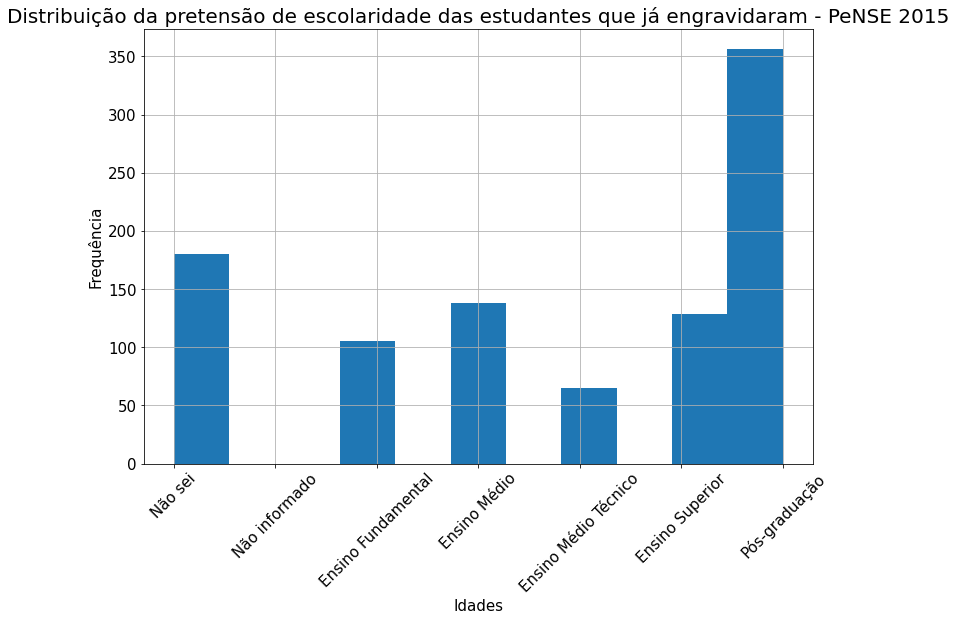

In [ ]:
pretensao_escolaridade_ja_engravidou['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade das estudantes que já engravidaram - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

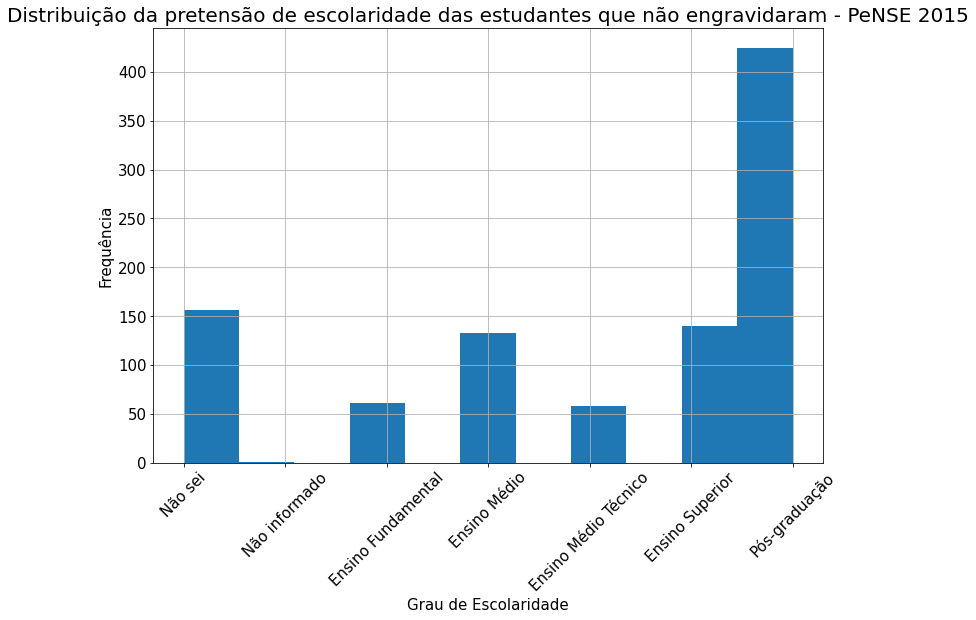

In [ ]:
pretensao_escolaridade_nunca_engravidou['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade das estudantes que não engravidaram - PeNSE 2015', fontsize=20)
plt.xlabel('Grau de Escolaridade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

Graficamente trata se de distribuições iguais.



---


Teste de distribuição não paramêtrico - $Ranksums$

In [ ]:
_, p_value = ranksums(pretensao_escolaridade_ja_engravidou['VB01025'],
                      pretensao_escolaridade_nunca_engravidou['VB01025'])

In [ ]:
print(f'P-value do teste de distribuição da idade e pretensão de escolaridade: {round(p_value, 2)}')

P-value do teste de distribuição da idade e pretensão de escolaridade: 0.0


In [ ]:
p_value < 0.05

True

P-value é menor do que 0.05, logo a hipótese nula (ambas as distribuições são iguais) deve ser rejeitada, deste modo a distribuição da pretensão de escolaridade das estudantes que já engravidaram alguma vez e das que nunca engravidaram são diferentes. 

**Estatisticamente a gravidez altera a pretensão do grau de escolaridade.**

In [ ]:
#Descrição grau de escolaridade
dic_escolaridade_pretensao_descricao = {
    0: 'Não sei',
    1: 'Não informado',
    2: 'Ensino Fundamental ',
    3: 'Ensino Médio',
    4: 'Ensino Médio Técnico',
    5: 'Ensino Superior',
    6: 'Pós-graduação'
}

In [ ]:
pretensao_escolaridade_ja_engravidou['VB01025'] = pretensao_escolaridade_ja_engravidou['VB01025'].map(dic_escolaridade_pretensao_descricao)
pretensao_escolaridade_nunca_engravidou['VB01025'] = pretensao_escolaridade_nunca_engravidou['VB01025'].map(dic_escolaridade_pretensao_descricao) 

In [ ]:
tabela_frequencia(pretensao_escolaridade_ja_engravidou, 'VB01025', 
                  'Pretensão de escolaridade já engravidou.')

,Frequência,Proporção %
Pretensão de escolaridade já engravidou.,,
Pós-graduação,356,36.6
Não sei,180,18.5
Ensino Médio,138,14.2
Ensino Superior,129,13.3
Ensino Fundamental,105,10.8
Ensino Médio Técnico,65,6.7


In [ ]:
tabela_frequencia(pretensao_escolaridade_nunca_engravidou, 'VB01025', 
                  'Pretensão de escolaridade nunca engravidou.')

,Frequência,Proporção %
Pretensão de escolaridade nunca engravidou.,,
Pós-graduação,424,43.6
Não sei,156,16.0
Ensino Superior,140,14.4
Ensino Médio,133,13.7
Ensino Fundamental,61,6.3
Ensino Médio Técnico,58,6.0
Não informado,1,0.1


As estudantes que nunca engravidaram apresentam maior proporção nos graus de escolaridade Pós-graduação e Ensino Superior pretendido,  enquanto as estudantes que já engravidaram apresentam maior proporção nos demais graus pretendidos.

#### 2.2.2.4 Prevenção a Gravidez e DST's

##### 2.2.2.4.1 Uso de preservativo na primeira relação sexual

In [ ]:
dados_amostra_1['VB08011'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08011',
                                                    'VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08011')
grafico_pizza(_, 'VB08011',
              'VOCÊ USOU PRESERVATIVO NA PRIMEIRA RELAÇÃO SEXUAL?')

In [ ]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB01001', 'VB08011', 'columns',
                         'Qual é o seu sexo?', 
                         'Você usou preservativo na primeira relação sexual?')

Você usou preservativo na primeira relação sexual?,Não,Não informado,Pulo no questionário,Sim
Qual é o seu sexo?,,,,
Feminino,28.5,35.1,57.7,41.1
Masculino,71.5,64.9,42.3,58.9


Obs: Proporção calculada pela coluna.

Dos 17,1% que fez uso de preservativo na primeira relação sexual 58.9% é do sexo masculino.

##### 2.2.2.4.2 Uso de algum método para evitar gravidez/ DST's na última relação sexual

In [ ]:
dados_amostra_1['VB08005'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08005',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08005')
grafico_barras(_, 'VB08005',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU ALGUM MÉTODO PARA EVITAR A GRAVIDEZ E/OU DST\'s',
               'Respostas', '%')

In [ ]:
print(f'''
Dos 28% que já tiveram relação sexual {6.8 + 3.1}% não utilizou ou não soube dizer 
do uso de algum método para evitar a gravidez e/ou DST\'s na última relação sexual.
17,9% fizeram uso de algum método preventivo.''')


Dos 28% que já tiveram relação sexual 9.9% não utilizou ou não soube dizer 
do uso de algum método para evitar a gravidez e/ou DST's na última relação sexual.
17,9% fizeram uso de algum método preventivo.


##### 2.2.2.4.3 Uso de preservativo na última relação sexual

In [ ]:
dados_amostra_1['VB08006'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08006',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU CAMISINHA (PRESERVATIVO)?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08006')
grafico_pizza(_, 'VB08006',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU CAMISINHA (PRESERVATIVO)?')

In [ ]:
print(f'''
Dos 28% que já tiveram relação sexual 18,6% usou preservativo na última relação.

Representando {round(18.6 / 28 * 100)}% dos que já tiveram relação sexual. 
''')


Dos 28% que já tiveram relação sexual 18,6% usou preservativo na última relação.

Representando 66% dos que já tiveram relação sexual. 



##### 2.2.2.4.4 Uso de outro método preventivo além do preservativo

In [ ]:
dados_amostra_1['VB08007'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08007',
                                                    'NA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), VOCÊ OU SEU(SUA) PARCEIRO(A) USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?T)')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08007')
grafico_barras(_, 'VB08007',
              'NA ÚLTIMA RELAÇÃO SEXUAL, USOU ALGUM OUTRO MÉTODO PARA EVITAR A GRAVIDEZ (NÃO CONTAR CAMISINHA)?',
               'Respostas', '%')

In [ ]:
print(f'''
Dos 28% que tiveram relação sexual 13,8% não fez uso de algum outro método 
preventivo além da camisinha.

Representando {round(13.85 / 28 * 100)}% dos que já tiveram relação sexual.
''')


Dos 28% que tiveram relação sexual 13,8% não fez uso de algum outro método 
preventivo além da camisinha.

Representando 49% dos que já tiveram relação sexual.



##### 2.2.2.4.5 Método preventivo utlizado

In [ ]:
dados_amostra_1['VB08012'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08012',
                                                    'NESTA ÚLTIMA VEZ QUE VOCÊ TEVE RELAÇÃO SEXUAL (TRANSOU), QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ OU SUA PARCEIRA USOU?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08012')
grafico_barras(_, 'VB08012',
               'NESTA ÚLTIMA RELAÇÃO SEXUAL, QUAL OUTRO MÉTODO PARA EVITAR GRAVIDEZ VOCÊ/PARCEIRA USOU?',
               'Método',
               '%')

Dos 10,5% que fez uso de algum método preventivo sem contar a camisinha 6,3% fez uso da pílula anticoncepcional. 

In [ ]:
print(f'''
Dos 10,5% que fez uso de algum método preventivo sem contar a camisinha 6,3% fez 
uso da pílula anticoncepcional. 

Represntando {round(6.32 / 10.51 * 100)}% dos que fizeram uso de algum método
além do preservativo.
''')


Dos 10,5% que fez uso de algum método preventivo sem contar a camisinha 6,3% fez 
uso da pílula anticoncepcional. 

Represntando 60% dos que fizeram uso de algum método
além do preservativo.



##### 2.2.2.4.6 Orientação na escola sobre prevenção de gravidez

In [ ]:
dados_amostra_1['VB08008'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08008',
                                                    'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08008')
grafico_pizza(_, 'VB08008', 
              'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE PREVENÇÃO DE GRAVIDEZ?')

In [ ]:
print(f'''
78% dos estudantes receberam orientação sobre prevenção à gravidez na escola, {round(5.87 + 15.7, 1)}%
não receberam ou nao souberam dizer.
''')


78% dos estudantes receberam orientação sobre prevenção à gravidez na escola, 21.6%
não receberam ou nao souberam dizer.



##### 2.2.2.4.7 Orientação na escola sobre AIDS ou DST'S

In [ ]:
dados_amostra_1['VB08009'] = altera_opcoes_resposta(dados_amostra_1,
                                         dicionario_variaveis_amostra_1,
                                         'VB08009',
                                         'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DOENÇAS SEXUALMENTE TRANSMISSÍVEIS (DST)?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB08009')
grafico_pizza(_, 'VB08009',
              'NA ESCOLA, RECEBEU ORIENTAÇÃO SOBRE AIDS OU OUTRAS DST\'s?')

In [ ]:
print(f'''
86,2% receberam orientação na escola sobre AIDS e DST\'s, {round(9.57 + 3.75, 1)}% não receberam
ou não souberam responder.
''')


86,2% receberam orientação na escola sobre AIDS e DST's, 13.3% não receberam
ou não souberam responder.



##### 2.2.2.4.8 Orientação para conseguir preservativo gratuitamente.

In [ ]:
dados_amostra_1['VB08010'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB08010',
                                                    'NA ESCOLA, VOCÊ JÁ RECEBEU ORIENTAÇÃO SOBRE COMO CONSEGUIR CAMISINHA (PRESERVATIVO) GRATUITAMENTE? ')

In [ ]:
_ = calcula_proporcao(dados_amostra_1,
                      'VB08010')
grafico_pizza(_, 'VB08010',
              'NA ESCOLA, RECEBEU ORIENTAÇÃO SOBRE COMO CONSEGUIR PRESERVATIVO GRATUITAMENTE?')

In [ ]:
print(f'''
66.7% receberam orientação na escola sobre como conseguir preservativo gratuitamente,
{26 + 6.8}% não receberam ou não souberam dizer.
''')


66.7% receberam orientação na escola sobre como conseguir preservativo gratuitamente,
32.8% não receberam ou não souberam dizer.



#### 2.2.2.5 Violência Sexual

##### 2.2.2.5.1 Forçado a ter relação sexual

In [ ]:
dados_amostra_1['VB09016'] = altera_opcoes_resposta(dados_amostra_1,
                                                    dicionario_variaveis_amostra_1,
                                                    'VB09016',
                                                    'ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL? ')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB09016')
grafico_pizza(_, 'VB09016',
              'ALGUMA VEZ NA VIDA VOCÊ FOI FORÇADO A TER RELAÇÃO SEXUAL?')

4% dos escolares do 9º ano confirmam que já foram forçados a ter relação sexual.

In [ ]:
tabela_cruzada_proporcao(dados_amostra_1, 'VB01001', 'VB09016', 'index',
                         'Qual é o seu sexo?',
                         'Já foi forçado a ter relação sexual?')

Já foi forçado a ter relação sexual?,Não,Não informado,Sim
Qual é o seu sexo?,,,
Feminino,95.0,0.5,4.5
Masculino,95.4,1.1,3.5


###### 2.2.2.5.1.1 Teste de hipótese
Hipótese nula $H_0$: Os estudantes que foram forçados a ter relação sexual tem a mesma pretensão do grau de escolaridade comparado aos demais estudantes.

Premissa 1: Quanto maior o grau de escolaridade pretendido maior o nível de auto-responsabilidade e motivação do estudante com relação a sua formação/ capacitação educacional.

Por quê fazer o teste: Para saber se há diferenças na perspectiva educacional dos dois grupos.

In [ ]:
'''
DataFrame contendo as estudantes que form forçados a ter relação sexual e a 
respectiva pretensão de escolaridade
'''
pretensao_escolaridade_sexo_forcado = pd.DataFrame(dados_amostra_1.query('VB09016 == "Sim"')['VB01025'])
pretensao_escolaridade_sexo_forcado['VB01025'] = pretensao_escolaridade_sexo_forcado['VB01025'].map(dic_escolaridade_pretensao) 

In [ ]:
'''
DataFrame contendo as estudantes que não foram forçados a ter relação sexual e a 
respectiva pretensão de escolaridade

Obs: Amostra do mesmo tamanho dos estudantes que foram forçados a ter relação 
sexual
'''
pretensao_escolaridade_nao_forcado = pd.DataFrame(dados_amostra_1.query('VB09016 == "Não"')['VB01025'].sample(n=4124, random_state=7))
pretensao_escolaridade_nao_forcado['VB01025'] = pretensao_escolaridade_nao_forcado['VB01025'].map(dic_escolaridade_pretensao) 

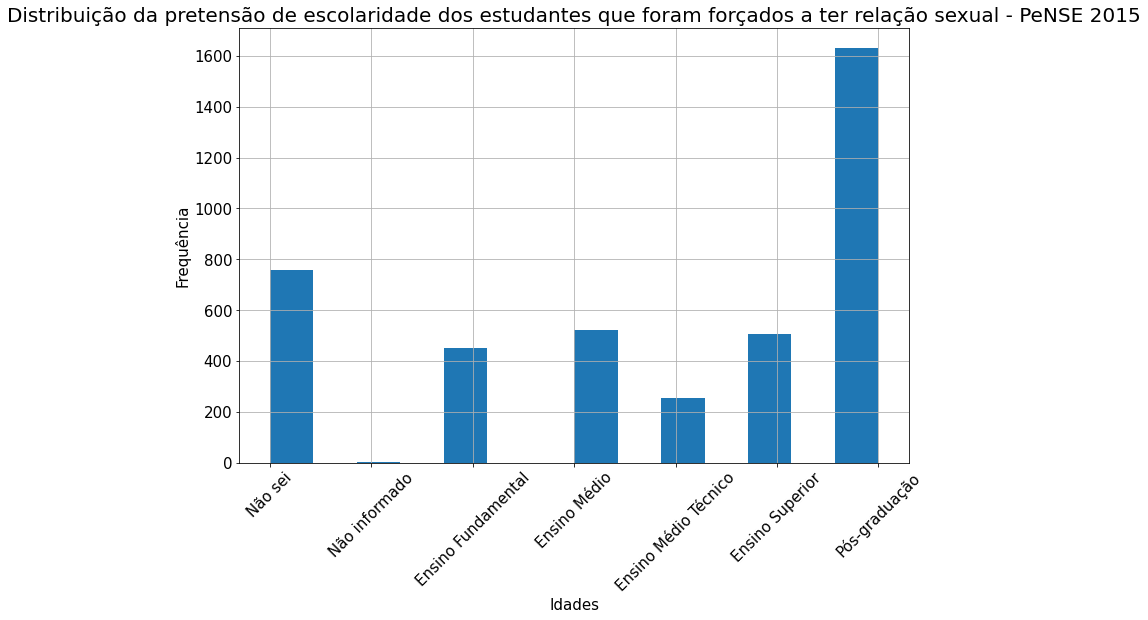

In [ ]:
pretensao_escolaridade_sexo_forcado['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade dos estudantes que foram forçados a ter relação sexual - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

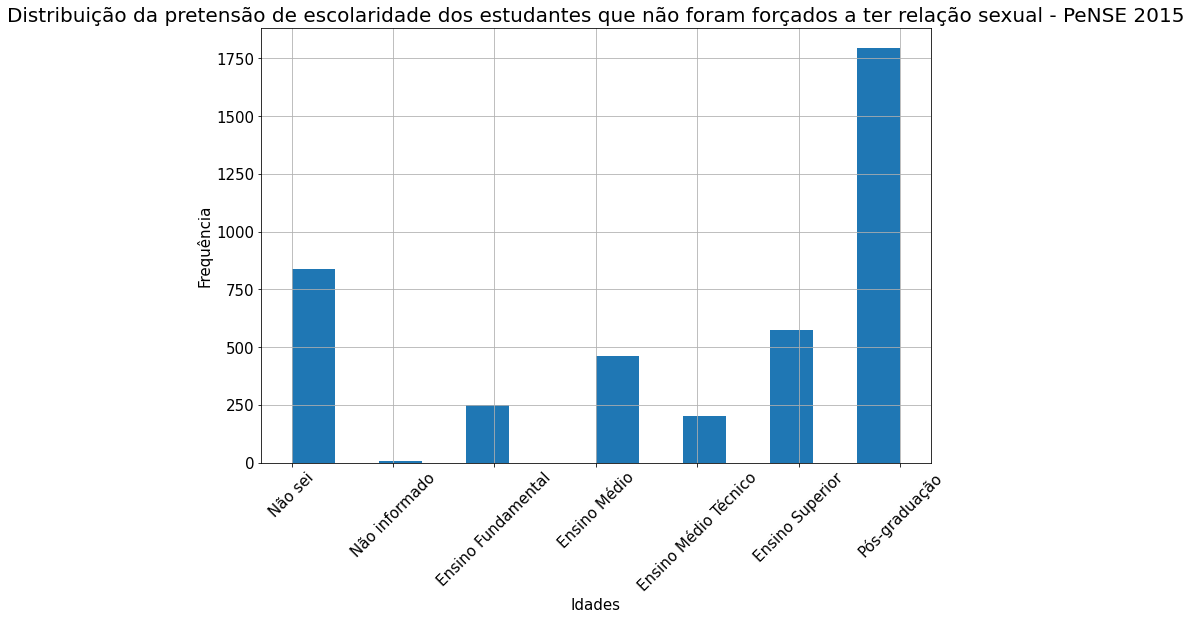

In [ ]:
pretensao_escolaridade_nao_forcado['VB01025'].hist(bins='sturges', figsize=(12, 8))
plt.title('Distribuição da pretensão de escolaridade dos estudantes que não foram forçados a ter relação sexual - PeNSE 2015', fontsize=20)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Não sei', 'Não informado', 
                                    'Ensino Fundamental',
                                    'Ensino Médio', 'Ensino Médio Técnico', 
                                    'Ensino Superior', 'Pós-graduação'])
plt.show()

Graficamente as distribuições são iguais.



---



Teste não paramétrico: $Ranksums$

In [ ]:
_, p_value = ranksums(pretensao_escolaridade_sexo_forcado,
                      pretensao_escolaridade_nao_forcado)

In [ ]:
print('P-value:', round(p_value, 2))

P-value: 0.0


In [ ]:
p_value < 0.05

True

P-value menor do que 0,05 a hipótes nula deve ser rejeitada.

**Estatisticamente os estudantes que foram forçados a ter relação sexual possuem o grau de escolaridade pretendido diferente dos estudantes que não foram forçados.**

Obs: Não é intenção do teste comprovar ou não dano psicológico dos estudantes que sofreram abuso.

In [ ]:
pretensao_escolaridade_sexo_forcado['VB01025'] = pretensao_escolaridade_sexo_forcado['VB01025'].map(dic_escolaridade_pretensao_descricao)
pretensao_escolaridade_nao_forcado['VB01025'] = pretensao_escolaridade_nao_forcado['VB01025'].map(dic_escolaridade_pretensao_descricao)

In [ ]:
tabela_frequencia(pretensao_escolaridade_sexo_forcado, 'VB01025',
                  'Pretensão de escolaridade forçados a ter relação sexual')

,Frequência,Proporção %
Pretensão de escolaridade forçados a ter relação sexual,,
Pós-graduação,1629,39.5
Não sei,759,18.4
Ensino Médio,522,12.7
Ensino Superior,507,12.3
Ensino Fundamental,451,10.9
Ensino Médio Técnico,253,6.1
Não informado,3,0.1


In [ ]:
tabela_frequencia(pretensao_escolaridade_nao_forcado, 'VB01025',
                  'Pretensão de escolaridade não forçados a ter relação sexual')

,Frequência,Proporção %
Pretensão de escolaridade não forçados a ter relação sexual,,
Pós-graduação,1793,43.5
Não sei,838,20.3
Ensino Superior,575,13.9
Ensino Médio,461,11.2
Ensino Fundamental,250,6.1
Ensino Médio Técnico,201,4.9
Não informado,6,0.1


Os estudantes que não foram forçados apresentam maior proporção na pretensão de escolaridade pós-graduação e graduação. Os estudantes que foram forçados presentam maior proporção nos graus do ensino méido, fundamental e técnico. 

Os teste não comprova causalidade, pois há outras variáveis de natureza social que devem ser avaliadas.

##### 2.2.2.5.2 Namorado(a)/ex-namorado(a) forçou a ter relação sexual

In [ ]:
dados_amostra_1['VB0901701'] = altera_opcoes_resposta(dados_amostra_1,
                                            dicionario_variaveis_amostra_1,
                                            'VB0901701',
                                            'UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901701')
grafico_pizza(_, 'VB0901701',
              'UM(A) NAMORADO(A)/EX-NAMORADO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 4% que foram forçados a ter relação sexual 1.1% confirmam que o responsável 
tenha sido um namorado(a)/ex-namorado(a).

Representando {round(1.1 / 4.04 * 100)}% dos responsáveis pelo abuso.
''')


Dos 4% que foram forçados a ter relação sexual 1.1% confirmam que o responsável 
tenha sido um namorado(a)/ex-namorado(a).

Representando 27% dos responsáveis pelo abuso.



##### 2.2.2.5.3 Forçado a ter relação sexual por um amigo(a)

In [ ]:
dados_amostra_1['VB0901702'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901702',
                                                      'UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901702')
grafico_pizza(_, 'VB0901702',
              'UM(A) AMIGO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 4% que foram forçados a ter relação sexual 0.8% confirmam que o responsável tenha sido um amigo(a).

Representando {round(0.82 / 4.04 * 100)}% do responsáveis pelo abuso.
''')


Dos 4% que foram forçados a ter relação sexual 0.8% confirmam que o responsável tenha sido um amigo(a).

Representando 20% do responsáveis pelo abuso.



##### 2.2.2.5.4 Forçado a ter relação sexual por pai/mãe/padastro/madrasta

In [ ]:
dados_amostra_1['VB0901703'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901703',
                                                      'SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901703')
grafico_pizza(_, 'VB0901703',
              'SEU PAI/MÃE/PADASTRO/MADRASTA FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 4% que foram forçados a ter relação sexual 0.45% afirmam que o responsável 
tenha sido o pai/mãe/padastro/madrasta.

Representando {round(0.45 / 4.04 * 100)}% dos responsáveis pelo abuso.

''')


Dos 4% que foram forçados a ter relação sexual 0.45% afirmam que o responsável 
tenha sido o pai/mãe/padastro/madrasta.

Representando 11% dos responsáveis pelo abuso.




##### 2.2.2.5.5 Forçado a ter relação sexual por outros familiares

In [ ]:
dados_amostra_1['VB0901704'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901704',
                                                      'OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901704')
grafico_pizza(_, 'VB0901704',
              'OUTROS FAMILIARES FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 4% que foram forçados a ter relação sexual 0.8% afirmam que o responsável 
tenha sido outro familiar.

Representando {round(0.8 / 4.04 * 100)}% dos responsáveis pelo abuso.

''')


Dos 4% que foram forçados a ter relação sexual 0.8% afirmam que o responsável 
tenha sido outro familiar.

Representando 20% dos responsáveis pelo abuso.




##### 2.2.2.5.6 Forçado a ter relação sexual por um(a) desconhecido(a)

In [ ]:
dados_amostra_1['VB0901705'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901705',
                                                      'UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901705')
grafico_pizza(_, 'VB0901705',
              'UM(A) DESCONHECIDO(A) FORÇOU VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 4% que foram forçados a ter relação sexual 0.6% confirmam que o(a) 
responsável tenha sido um(a) desconhecido(a).

Representando {round(0.59 / 4.04 * 100)}% dos responsáveis pelo abuso.

''')


Dos 4% que foram forçados a ter relação sexual 0.6% confirmam que o(a) 
responsável tenha sido um(a) desconhecido(a).

Representando 15% dos responsáveis pelo abuso.




##### 2.2.2.5.7 Outras pessoas forçaram relação sexual

In [ ]:
dados_amostra_1['VB0901706'] = altera_opcoes_resposta(dados_amostra_1,
                                                      dicionario_variaveis_amostra_1,
                                                      'VB0901706',
                                                      'OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
_ = calcula_proporcao(dados_amostra_1, 'VB0901706')
grafico_pizza(_, 'VB0901706',
              'OUTRAS PESSOAS FORÇARAM VOCÊ A TER RELAÇÃO SEXUAL?')

In [ ]:
print(f'''
Dos 4% que foram forçados a ter relação sexual 0.5% afirmam que o responsável 
tenha sido outras pessoas.

Representando {round(0.51 / 4.04 * 100)}% dos responsáveis pelo abuso.

''')


Dos 4% que foram forçados a ter relação sexual 0.5% afirmam que o responsável 
tenha sido outras pessoas.

Representando 13% dos responsáveis pelo abuso.




In [ ]:
print(f'''
Dos 4% que foram forçados a ter relação sexual aproximadamente {round(1.1 + 0.8 + 0.45 + 0.8,1)}% afirmam
que o responsável tenha  sido um familiar ou pessoa conhecida (pai/mãe/padrasto/
madrasta, familiar, namorado(a)/ex-namorado(a), amigo(a)).

Representando {round(3.2 / 4.4 * 100)}% dos responsáveis pelo abuso.


0.5% tiveram mais de um(a) abusador(a).
''')


Dos 4% que foram forçados a ter relação sexual aproximadamente 3.2% afirmam
que o responsável tenha  sido um familiar ou pessoa conhecida (pai/mãe/padrasto/
madrasta, familiar, namorado(a)/ex-namorado(a), amigo(a)).

Representando 73% dos responsáveis pelo abuso.


0.5% tiveram mais de um(a) abusador(a).



## 2.3 Sumarização dos Resultados

### 2.3.1 Amostra 1

Estudantess do 9º ano do ensino fundamental.

1. Sexo: Aproximadamente 50% masculino e 50% feminíno;
2. Já tiveram relação sexual: 28%;
3. Já engravidaram: 0,95% representado 9,4% dos respondentes que não pularam a pergunta;
4. Usou preservativo na primeira relação sexual: 17,1% representando 61,1% dos respondentes que não pularam a pergunta;
5. Usou preservativo na última relação sexual: 18,6% representando 66,3% dos respondentes que não pularam a pergunta;
6. Orientados na escola sobre prevenção à gravidez: 78%;
7. Orientados na escola sobre prevenção à AIDS e DST's: 86,2%;
8. Foram forçados a ter relação sexual: 4%;
9. Responsáveis pelo abuso sexual: 73% são pessoas conhecidas (namorado(a)/ex-namorado(a), amigo(a), pai/mãe/padastro/madrasta, outros familiares.)
10. Estatisticamente a gravidez altera no grau de escolaridade pretendido.
11. Estatisticamente a pretensão do grau de escolaridade dos estudantes que foram forçados a ter relação sexual não é a mesma dos que não foram forçados.

### 2.3.2 Amostra 2

Estudantes do 6º ano do ensino fundamental ao 3º ano do ensino médio.



1. Sexo: Aproximadamente 50% masculino e 50% feminíno;
2. Já tiveral relação sexual: 36,9%;
3. Já engravidaram: 1,3% representado 11,5% dos respondentes que não pularam a questão;
4. Usou preservativo na primeira relação sexual: 14,4% representando 64,6% dos respondentes que não pularam a questão;
5. Usou preservativo na última relação sexual: 17,3% representando 64,3% dos respondentes que não pularam a questão; 
6. Orientados na escola sobre prevenão à gravidez: 52,5%;
7. Orientados na escola sobre AIDS e DST's: 58,8%;
8. Foram forçados a ter relação sexual: 3,4%;
9. Responsáveis pelo abuso sexual: 79% são pessoas conhecidas (namorado(a)/ex-namorado(a), amigo(a), pai/mãe/padastro/madrasta, outros familiares.)
10. Estatisticamente a gravidez não altera no grau de escolaridade pretendido.
11. Estatisticamente a pretensão do grau de escolaridade dos estudantes que foram forçados a ter relação sexual é a mesma dos que não foram forçados.

# **3 Considerações Finais**

Para a amostra 1 constatou se que parcela significativa dos escolares foram orientados na escola sobre prevenção à gravidez e DST's, na amostra 2 a proporção de alunos que receberam orientação foi menor, mas em nenhuma das perguntas de ambas as amostras obteve se uma proporção de ao menos 90% de respostas positivas (estudantes orientados). 

Dentre os resultados destaca se além da necessidade de uma maior proporção de escolares receberem orientação sobre AIDS e DST's o fato de que os escolares que foram forçados a ter relação sexual confirmarem que o responsável tenha sido uma pessoa próxima/ conhecida (namorado(a)/ex-namorado(a), amigo(a), pai/mãe/padastro/madrasta, outros familiares), mas não se sabe quantos desses escolares que sofreram a violência sexual chegaram a denunciar e quantos foram conscientizados/ orientados a realizar a denúncia. 

Os resultados dos testes estatísticos da pretensão de escolaridade relacionada a gravidez e relação sexual imposta foram diferentes da amostra 1 para a amostra 2, um possível fator é o tamanho da amostra 1 ser muito maior.

Em pesquisas posteriores sugere se a investigação da idade média da primeira relação sexual, e se essa idade está diminuíndo, essa informação é relevante para que os jovens recebam a orientação não apenas na escola mas também dos pais, evitando assim gravidez precoce e contração de DST's.  

# **4 Agradecimentos**

Agradeço a toda a equipe da [Alura](https://www.alura.com.br/) envolvida no Bootcamp por entregar um serviço de excelente qualidade, em especial ao professor [Thiago Gonçalves](https://www.linkedin.com/in/thiago-gon%C3%A7alves-santos/) pelas aulas ministradas e pelo desafio de criar um dicionário Python do dicionário de variáveis da pesquisa PeNSE, facilitou muito na construção desse relatório. Também ao professor [Allan Spadini](https://www.linkedin.com/in/allan-spadini-3561b023/) por esclarecer muitas dúvidas sobre estatística neste módulo e ao professor [Rodrigo Feranndo Dias](https://www.linkedin.com/in/rodrigo-fernando-dias-118181120/) pelos excelentes cursos de estatística com Python ministrados na Alura. 

# **5 Referências**

IBGE. Pesquisa Nacional de Saúde do Escolar - PeNSE. Disponível em: https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e. Acesso em: 28 Dez. 2020.

IBGE. Pesquina Nacional de Saúde do Escolar 2015: Nota metodológica nº 1. Disponível em: https://ftp.ibge.gov.br/pense/2015/microdados/Notas_Metodologicas/Nota_metodologica_01_utilizacao_microdados_20180514.pdf. Acesso em: 5 Jan. 2021.



---

